In [385]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from utills import *

# Exploratory Data Analysis
---

## Load the Data

In [386]:
# Load the dataset
df = pd.read_csv('../data/youtube_data_processed.csv')

df.head()

,video_id,title,thumbnail_url,views,likes,comments,subscriber_count,date_posted,duration,tags,...,fear_emotion,happy_emotion,sad_emotion,surprise_emotion,neutral_emotion,title_length,average_brightness,contrast,saturation,hue
0,LYUKvSH-zX4,Dave Ramsey's Advice For Young People Who Want...,https://i.ytimg.com/vi/LYUKvSH-zX4/maxresdefau...,2064234,57654,988,1160000,2022-04-11T00:23:26Z,1217,"['freenvesting', 'free investing', 'how to pro...",...,0.15,0.07,0.42,0.00,0.07,58,0.33535,52.45587,63.37636,27.19365
1,VjgWbcpVZVw,"I'm 23, How Should I Be Investing?",https://i.ytimg.com/vi/VjgWbcpVZVw/maxresdefau...,316844,6264,687,3290000,2021-03-16T13:00:17Z,297,"['the dave ramsey show', 'budget money debt ca...",...,0.04,0.00,0.18,0.00,0.66,34,0.51486,58.65743,68.30351,35.35573
2,YCHAqn4mMpM,7 Money Tips I Wish I Knew In My 20s,https://i.ytimg.com/vi/YCHAqn4mMpM/maxresdefau...,217821,9044,177,1240000,2023-09-17T12:00:21Z,535,"['nischa', 'accountant explaiins', 'money', 'i...",...,0.00,1.00,0.00,0.00,0.00,36,0.33827,47.69697,17.08849,33.92205
3,IIKr2915l2g,Do This EVERY Time You Get Paid (Paycheck Rout...,https://i.ytimg.com/vi/IIKr2915l2g/maxresdefau...,2160464,70105,1147,675000,2023-09-16T15:00:22Z,845,"['paycheck breakdown', 'payday routine', 'payc...",...,0.00,0.00,0.00,0.00,0.00,50,0.63230,66.93125,24.64309,32.66472
4,v9Va136MHtg,Major MONEY Milestones To Accomplish in Your 20s!,https://i.ytimg.com/vi/v9Va136MHtg/maxresdefau...,670824,18348,458,1360000,2022-06-21T22:45:01Z,978,"['humphreytalks', 'real estate investing', 'in...",...,0.01,0.05,0.01,0.01,0.89,49,0.36546,52.66566,77.42372,35.24446


## Understanding the Data

In [387]:
df.shape

(9300, 42)

In [388]:
df.describe()

,views,likes,comments,subscriber_count,duration,color_1_r,color_1_g,color_1_b,color_2_r,color_2_g,...,fear_emotion,happy_emotion,sad_emotion,surprise_emotion,neutral_emotion,title_length,average_brightness,contrast,saturation,hue
count,9.300000e+03,9.300000e+03,9300.000000,9.300000e+03,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,...,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000
mean,3.360045e+06,5.027732e+04,1683.763226,2.974627e+06,1439.185054,122.537097,113.975161,107.071720,135.388495,127.743333,...,0.086017,0.344858,0.171987,0.049087,0.269529,57.745269,0.452563,52.405207,36.542729,32.067543
std,2.060290e+07,2.496216e+05,7253.083358,1.049347e+07,3237.159820,82.660732,77.889225,78.884043,84.894678,81.440267,...,0.213586,0.785532,0.421540,0.170721,0.601215,19.851415,0.150550,10.869535,16.123044,14.639987
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.025050,6.797170,0.000000,0.000000
25%,4.266200e+04,8.920000e+02,46.000000,4.520000e+04,434.750000,41.000000,41.000000,36.000000,48.000000,47.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.347938,45.675597,25.071922,21.059832
50%,2.797190e+05,5.547000e+03,249.000000,3.630000e+05,722.500000,120.000000,107.000000,90.000000,147.000000,132.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,55.000000,0.452600,52.665265,35.220420,30.950660
75%,1.542857e+06,2.709600e+04,1019.750000,1.840000e+06,1236.000000,202.000000,179.000000,175.000000,218.000000,203.000000,...,0.070000,0.460000,0.160000,0.010000,0.310000,71.000000,0.555347,59.575238,46.779020,42.020145
max,9.557001e+08,9.297774e+06,277274.000000,3.130000e+08,93083.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,3.730000,17.010000,7.870000,4.340000,10.000000,100.000000,0.943670,89.835230,96.542620,90.438310


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            9300 non-null   object 
 1   title               9300 non-null   object 
 2   thumbnail_url       9300 non-null   object 
 3   views               9300 non-null   int64  
 4   likes               9300 non-null   int64  
 5   comments            9300 non-null   int64  
 6   subscriber_count    9300 non-null   int64  
 7   date_posted         9300 non-null   object 
 8   duration            9300 non-null   int64  
 9   tags                9300 non-null   object 
 10  category            9300 non-null   object 
 11  color_1_r           9300 non-null   int64  
 12  color_1_g           9300 non-null   int64  
 13  color_1_b           9300 non-null   int64  
 14  color_2_r           9300 non-null   int64  
 15  color_2_g           9300 non-null   int64  
 16  color_

In [390]:
# Dropping columns that are not needed
df = df.drop(['video_id', 'title', 'thumbnail_url', 'likes', 'comments', 'tags', 'category'], axis=1)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   views               9300 non-null   int64  
 1   subscriber_count    9300 non-null   int64  
 2   date_posted         9300 non-null   object 
 3   duration            9300 non-null   int64  
 4   color_1_r           9300 non-null   int64  
 5   color_1_g           9300 non-null   int64  
 6   color_1_b           9300 non-null   int64  
 7   color_2_r           9300 non-null   int64  
 8   color_2_g           9300 non-null   int64  
 9   color_2_b           9300 non-null   int64  
 10  color_3_r           9300 non-null   int64  
 11  color_3_g           9300 non-null   int64  
 12  color_3_b           9300 non-null   int64  
 13  color_4_r           9300 non-null   int64  
 14  color_4_g           9300 non-null   int64  
 15  color_4_b           9300 non-null   int64  
 16  color_

# Data Cleaning and Feature Engineering

## Handle missing values

In [392]:
df.isnull().sum()

views                    0
subscriber_count         0
date_posted              0
duration                 0
color_1_r                0
color_1_g                0
color_1_b                0
color_2_r                0
color_2_g                0
color_2_b                0
color_3_r                0
color_3_g                0
color_3_b                0
color_4_r                0
color_4_g                0
color_4_b                0
color_5_r                0
color_5_g                0
color_5_b                0
is_text_present          0
total_word_count         0
main_text_size           0
num_persons              0
angry_emotion         1198
disgust_emotion       1198
fear_emotion          1198
happy_emotion         1198
sad_emotion           1198
surprise_emotion      1198
neutral_emotion       1198
title_length             0
average_brightness       0
contrast                 0
saturation               0
hue                      0
dtype: int64

<Axes: >

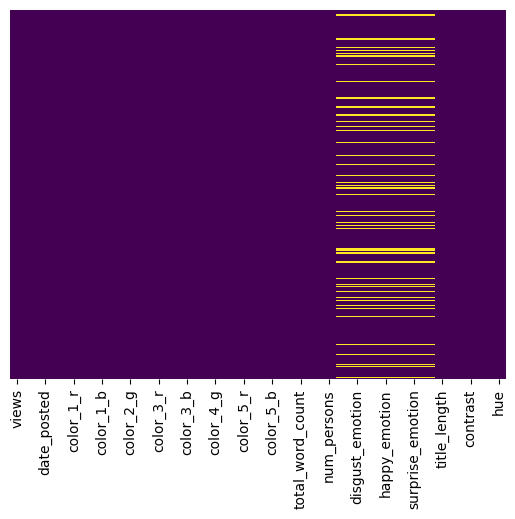

In [393]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [394]:
# Setting the missing values
columns_to_fill = ['angry_emotion', 'disgust_emotion', 'fear_emotion', 
                   'happy_emotion', 'sad_emotion', 'surprise_emotion', 
                   'neutral_emotion']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

<Axes: >

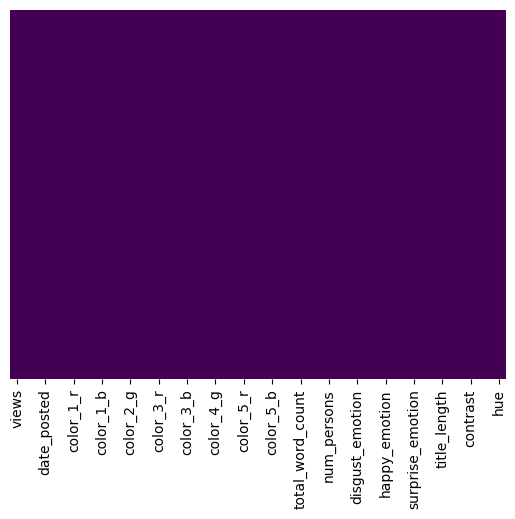

In [395]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Feature engineering

### Categorizing views

In [396]:
from datetime import datetime

# Ensure 'date_posted' is in datetime format and make it timezone-naive
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Remove timezone information if it exists
df['date_posted'] = df['date_posted'].dt.tz_localize(None)

# Calculate the number of days since each video was posted
df['days_since_posted'] = (datetime.now() - df['date_posted']).dt.days

# Calculate Age-Weighted Views (AWV)
df['age_weighted_views'] = df['views'] / (df['days_since_posted'] + 1)**0.5

In [397]:
bins = [
    0, 
    df['age_weighted_views'].quantile(0.10),  # Very Low (0 to 10th percentile)
    df['age_weighted_views'].quantile(0.25),  # Low (10th to 25th percentile)
    df['age_weighted_views'].quantile(0.75),  # Medium (25th to 75th percentile)
    df['age_weighted_views'].quantile(0.90),  # High (75th to 90th percentile)
    df['age_weighted_views'].max()            # Very High (90th percentile to max)
]
labels = [0, 1, 2, 3, 4]

# Categorize 'age_weighted_views' into bins
df['views_category'] = pd.cut(df['age_weighted_views'], bins=bins, labels=labels, include_lowest=True)

# Check the result
df['views_category'].value_counts()

views_category
2    4651
1    1395
3    1394
0     930
4     930
Name: count, dtype: int64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='views_category', ylabel='count'>

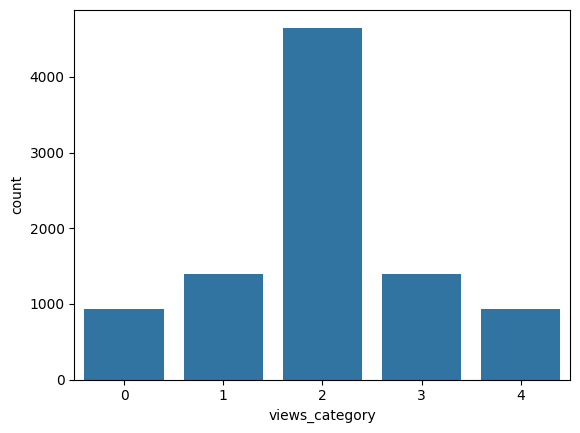

In [398]:
# Visually check the counts of each category
sns.countplot(x='views_category', data=df)

In [399]:
df[['views_category', 'age_weighted_views', 'views', 'days_since_posted']].sample(5)

,views_category,age_weighted_views,views,days_since_posted
1577,2,4899.753855,69466,200
2633,0,4.788521,120,627
6004,2,64886.417182,1708128,692
6717,2,19157.394293,121162,39
7693,1,1047.994926,41193,1544


In [400]:
df.drop(['date_posted', 'days_since_posted', 'age_weighted_views', 'views'], axis=1, inplace=True)
df.columns

Index(['subscriber_count', 'duration', 'color_1_r', 'color_1_g', 'color_1_b',
       'color_2_r', 'color_2_g', 'color_2_b', 'color_3_r', 'color_3_g',
       'color_3_b', 'color_4_r', 'color_4_g', 'color_4_b', 'color_5_r',
       'color_5_g', 'color_5_b', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'views_category'],
      dtype='object')

### Categorzing colors

In [401]:
# Apply color categorization for the top 5 dominant colors
for i in range(1, 6):
    df[[f'dominant_color_{i}', f'dominant_color_{i}_name']] = df.apply(
        lambda row: pd.Series(closest_color_name(
            (row[f'color_{i}_r'], row[f'color_{i}_g'], row[f'color_{i}_b']))), axis=1
    )

In [402]:
df[['dominant_color_1', 'dominant_color_1_name', 'dominant_color_2', 'dominant_color_2_name']].sample(5)

,dominant_color_1,dominant_color_1_name,dominant_color_2,dominant_color_2_name
4758,120,rosybrown,7,black
6707,59,indianred,71,lightgray
8,143,white,7,black
4256,7,black,53,gray
4448,63,lavender,36,darkslategray


In [403]:
df.drop(['color_1_r', 'color_1_g','color_1_b', 
        'color_2_r', 'color_2_g', 'color_2_b', 
        'color_3_r','color_3_g', 'color_3_b', 
        'color_4_r', 'color_4_g', 'color_4_b',
        'color_5_r', 'color_5_g', 'color_5_b' ], axis=1, inplace=True)
df.columns

Index(['subscriber_count', 'duration', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'views_category', 'dominant_color_1',
       'dominant_color_1_name', 'dominant_color_2', 'dominant_color_2_name',
       'dominant_color_3', 'dominant_color_3_name', 'dominant_color_4',
       'dominant_color_4_name', 'dominant_color_5', 'dominant_color_5_name'],
      dtype='object')

In [404]:
df.drop([ 'dominant_color_1_name',
       'dominant_color_2_name', 
       'dominant_color_3_name',
       'dominant_color_4_name',
       'dominant_color_5_name'], axis=1, inplace=True)
df.columns

Index(['subscriber_count', 'duration', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'views_category', 'dominant_color_1',
       'dominant_color_2', 'dominant_color_3', 'dominant_color_4',
       'dominant_color_5'],
      dtype='object')

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   subscriber_count    9300 non-null   int64   
 1   duration            9300 non-null   int64   
 2   is_text_present     9300 non-null   bool    
 3   total_word_count    9300 non-null   int64   
 4   main_text_size      9300 non-null   float64 
 5   num_persons         9300 non-null   int64   
 6   angry_emotion       9300 non-null   float64 
 7   disgust_emotion     9300 non-null   float64 
 8   fear_emotion        9300 non-null   float64 
 9   happy_emotion       9300 non-null   float64 
 10  sad_emotion         9300 non-null   float64 
 11  surprise_emotion    9300 non-null   float64 
 12  neutral_emotion     9300 non-null   float64 
 13  title_length        9300 non-null   int64   
 14  average_brightness  9300 non-null   float64 
 15  contrast            9300 non-null   fl

### Dealing with skewed data

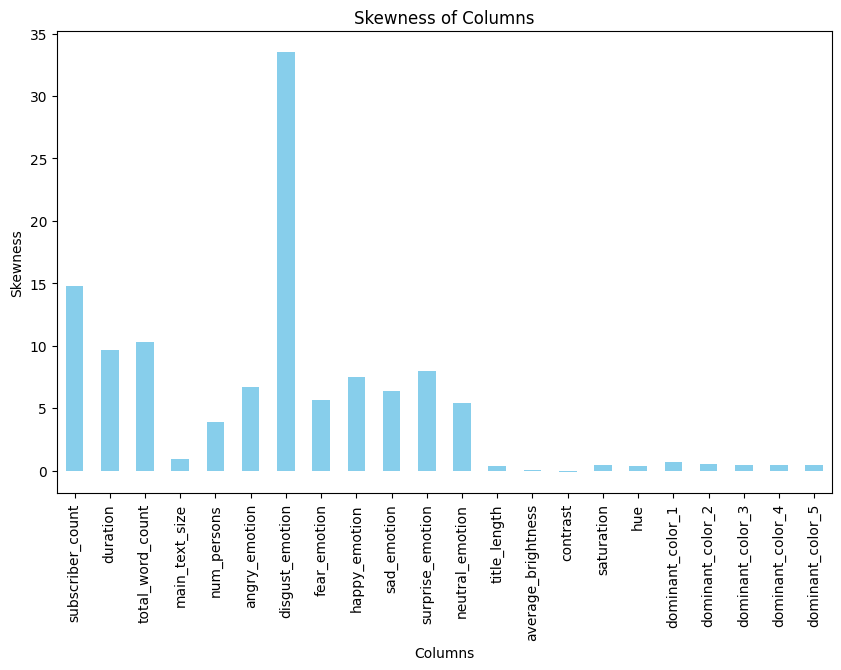

In [406]:
plt.figure(figsize=(10, 6))
df.select_dtypes(include=['number']).skew().plot(kind='bar', color='skyblue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

In [407]:
def skewness_check(data):
    total_left_skewed = 0
    total_right_skewed = 0
    for column in data.select_dtypes(include=['number']):
        skewness = round(data[column].skew(), 3)
    
        # Checking if the skewness is between -1 and 1
        if (skewness < -1):
            print(f"{column} : {skewness} (Left skewed)")
            total_left_skewed = total_left_skewed + 1
        if (skewness > 1):
            print(f"{column} : {skewness} (Right skewed)")
            total_right_skewed = total_right_skewed + 1
        
    print(f'\n')
    print(f'Total skewed columns: {total_left_skewed + total_right_skewed}')
    print(f'Total left skewed columns: {total_left_skewed}')
    print(f'Total right skewed columns: {total_right_skewed}')

skewness_check(df)

subscriber_count : 14.763 (Right skewed)
duration : 9.621 (Right skewed)
total_word_count : 10.32 (Right skewed)
num_persons : 3.891 (Right skewed)
angry_emotion : 6.729 (Right skewed)
disgust_emotion : 33.483 (Right skewed)
fear_emotion : 5.681 (Right skewed)
happy_emotion : 7.506 (Right skewed)
sad_emotion : 6.358 (Right skewed)
surprise_emotion : 7.983 (Right skewed)
neutral_emotion : 5.421 (Right skewed)


Total skewed columns: 11
Total left skewed columns: 0
Total right skewed columns: 11


In [408]:
def transform_data(data):

    # Getting a copy of the dataset, so we can return without changing original dataset
    data_copy = data.copy()

    for column in data_copy.select_dtypes(include=['number']):
        skewness = round(data_copy[column].skew(), 3)
        
        # Checking if the skewness is between -1 and 1, 
        # because if it fit in that range we can use them without transforming
        if (skewness < -1):
            data_copy[column] = np.log1p(data_copy[column].abs())
        if (skewness > 1):
            data_copy[column] = np.sqrt(data_copy[column])
        
    print(f'Transformed completed.')
    return data_copy


# Transforming data to fix skewness of dataset columns
transformed_data = transform_data(df)

Transformed completed.


In [409]:
# Rechecking skewness of transformed data
skewness_check(transformed_data)

subscriber_count : 3.177 (Right skewed)
duration : 3.537 (Right skewed)
total_word_count : 2.482 (Right skewed)
angry_emotion : 2.163 (Right skewed)
disgust_emotion : 9.37 (Right skewed)
fear_emotion : 2.077 (Right skewed)
happy_emotion : 1.767 (Right skewed)
sad_emotion : 2.011 (Right skewed)
surprise_emotion : 3.134 (Right skewed)
neutral_emotion : 1.773 (Right skewed)


Total skewed columns: 10
Total left skewed columns: 0
Total right skewed columns: 10


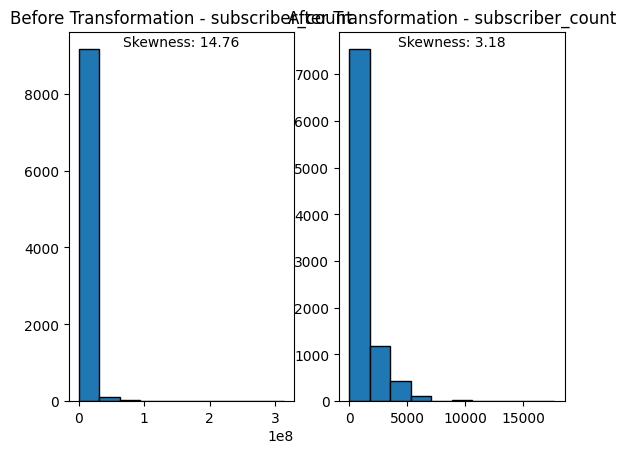

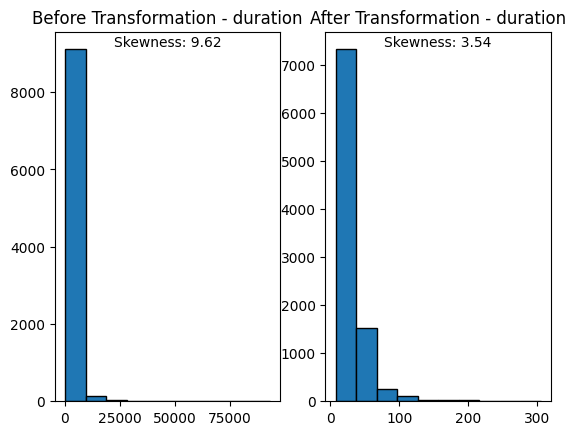

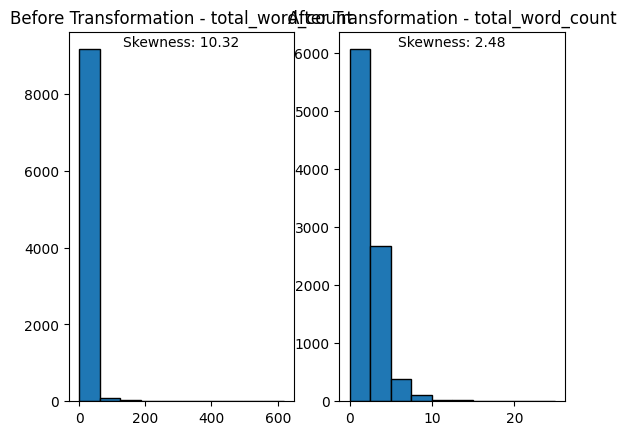

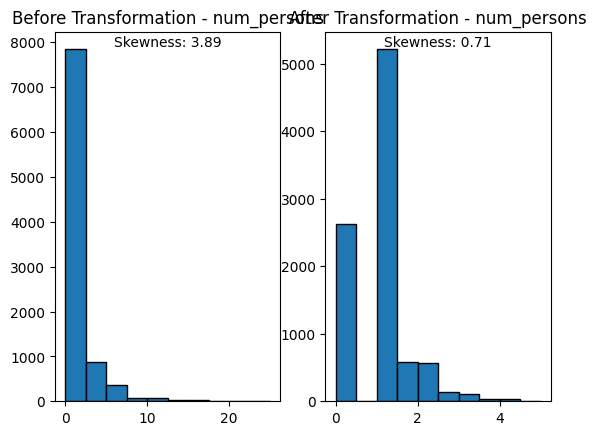

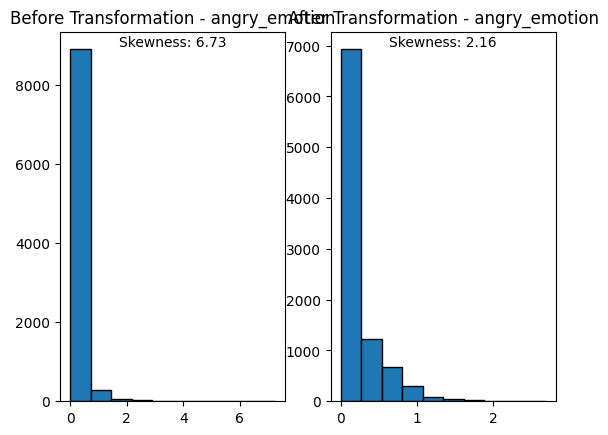

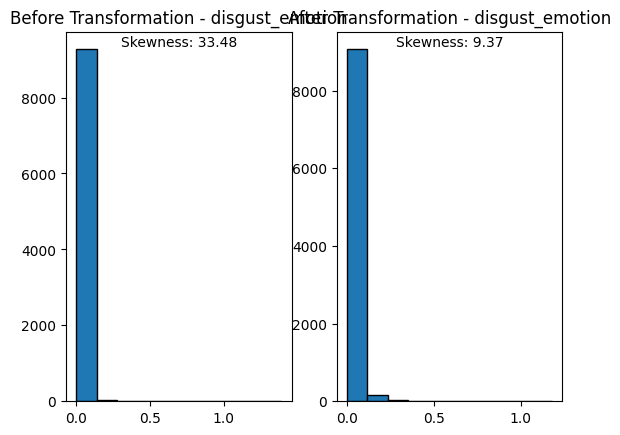

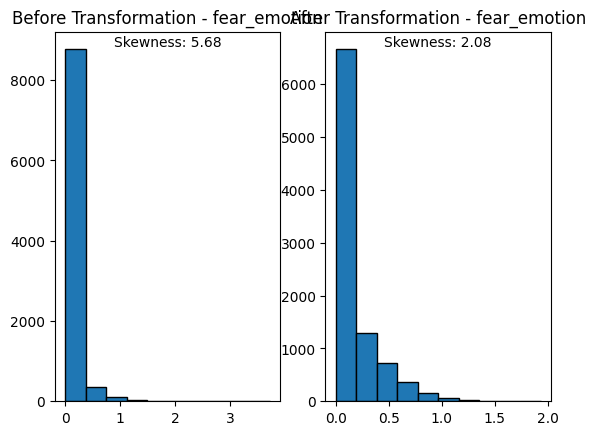

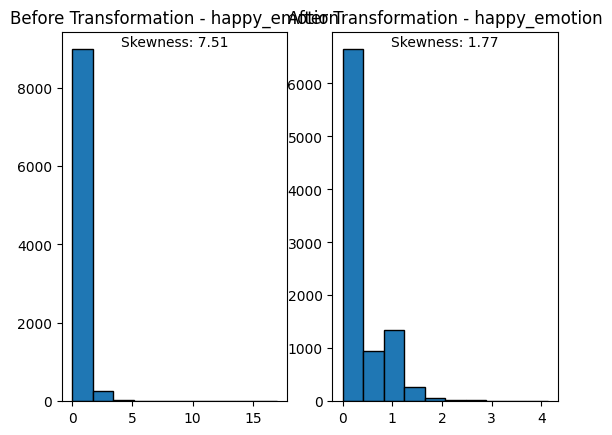

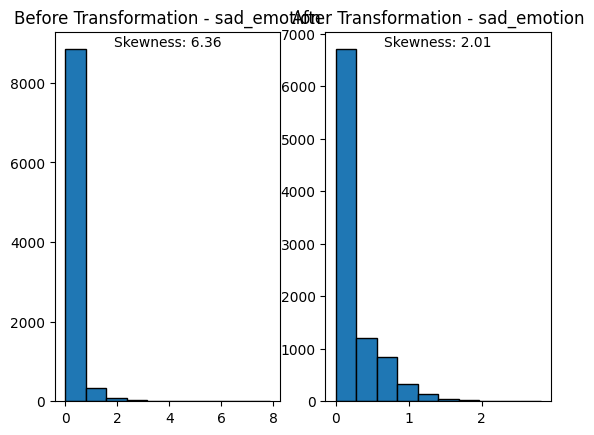

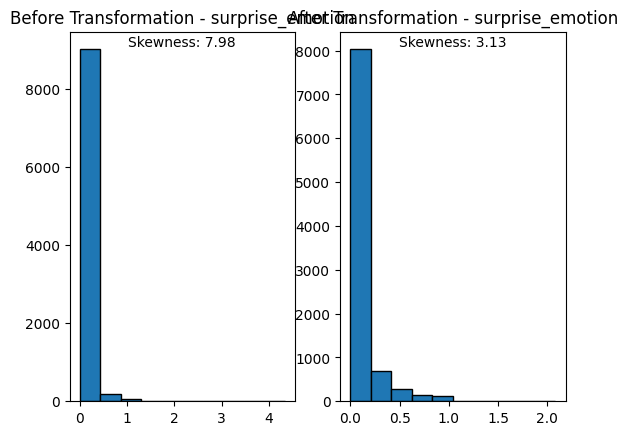

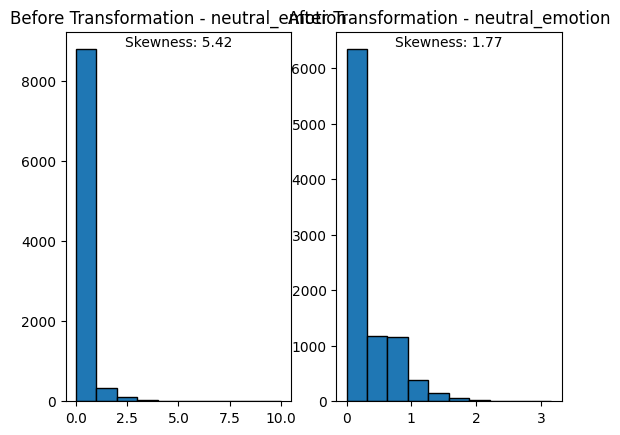

In [410]:
# Showing visually before and after transformation, skewed fixed.
def plot_before_after_transformation(original_data, transformed_data, title):

    skewness_original = round(original_data.skew(), 2)
    skewness_transformed = round(transformed_data.skew(), 2)

    fig, axs = plt.subplots(nrows=1, ncols=2)

    axs[0].hist(original_data, edgecolor='black')
    axs[0].set_title(f"Before Transformation - {title}")
    axs[0].annotate(f"Skewness: {skewness_original}", xy=(0.5, 0.96), xycoords='axes fraction', ha='center')

    axs[1].hist(transformed_data, edgecolor='black')
    axs[1].set_title(f"After Transformation - {title}")
    axs[1].annotate(f"Skewness: {skewness_transformed}", xy=(0.5, 0.96), xycoords='axes fraction', ha='center')
    
# Visualize the transformation for all the columns which are skewed
def visualize_transformation(original_data, transformed_data):
    for column in original_data.select_dtypes(include=['number']):
        skewness = round(original_data[column].skew(), 3)

        # Checking if the skewness is between -1 and 1
        if (skewness < -1) | (skewness > 1):
            plot_before_after_transformation(original_data[column], transformed_data[column], column)

# Visualize the transformation
visualize_transformation(df, transformed_data)


In [411]:
# Replacing transform data into original data
df = transformed_data

# Rechecking skewness to make sure
skewness_check(df)

subscriber_count : 3.177 (Right skewed)
duration : 3.537 (Right skewed)
total_word_count : 2.482 (Right skewed)
angry_emotion : 2.163 (Right skewed)
disgust_emotion : 9.37 (Right skewed)
fear_emotion : 2.077 (Right skewed)
happy_emotion : 1.767 (Right skewed)
sad_emotion : 2.011 (Right skewed)
surprise_emotion : 3.134 (Right skewed)
neutral_emotion : 1.773 (Right skewed)


Total skewed columns: 10
Total left skewed columns: 0
Total right skewed columns: 10


## Dealing Outliers

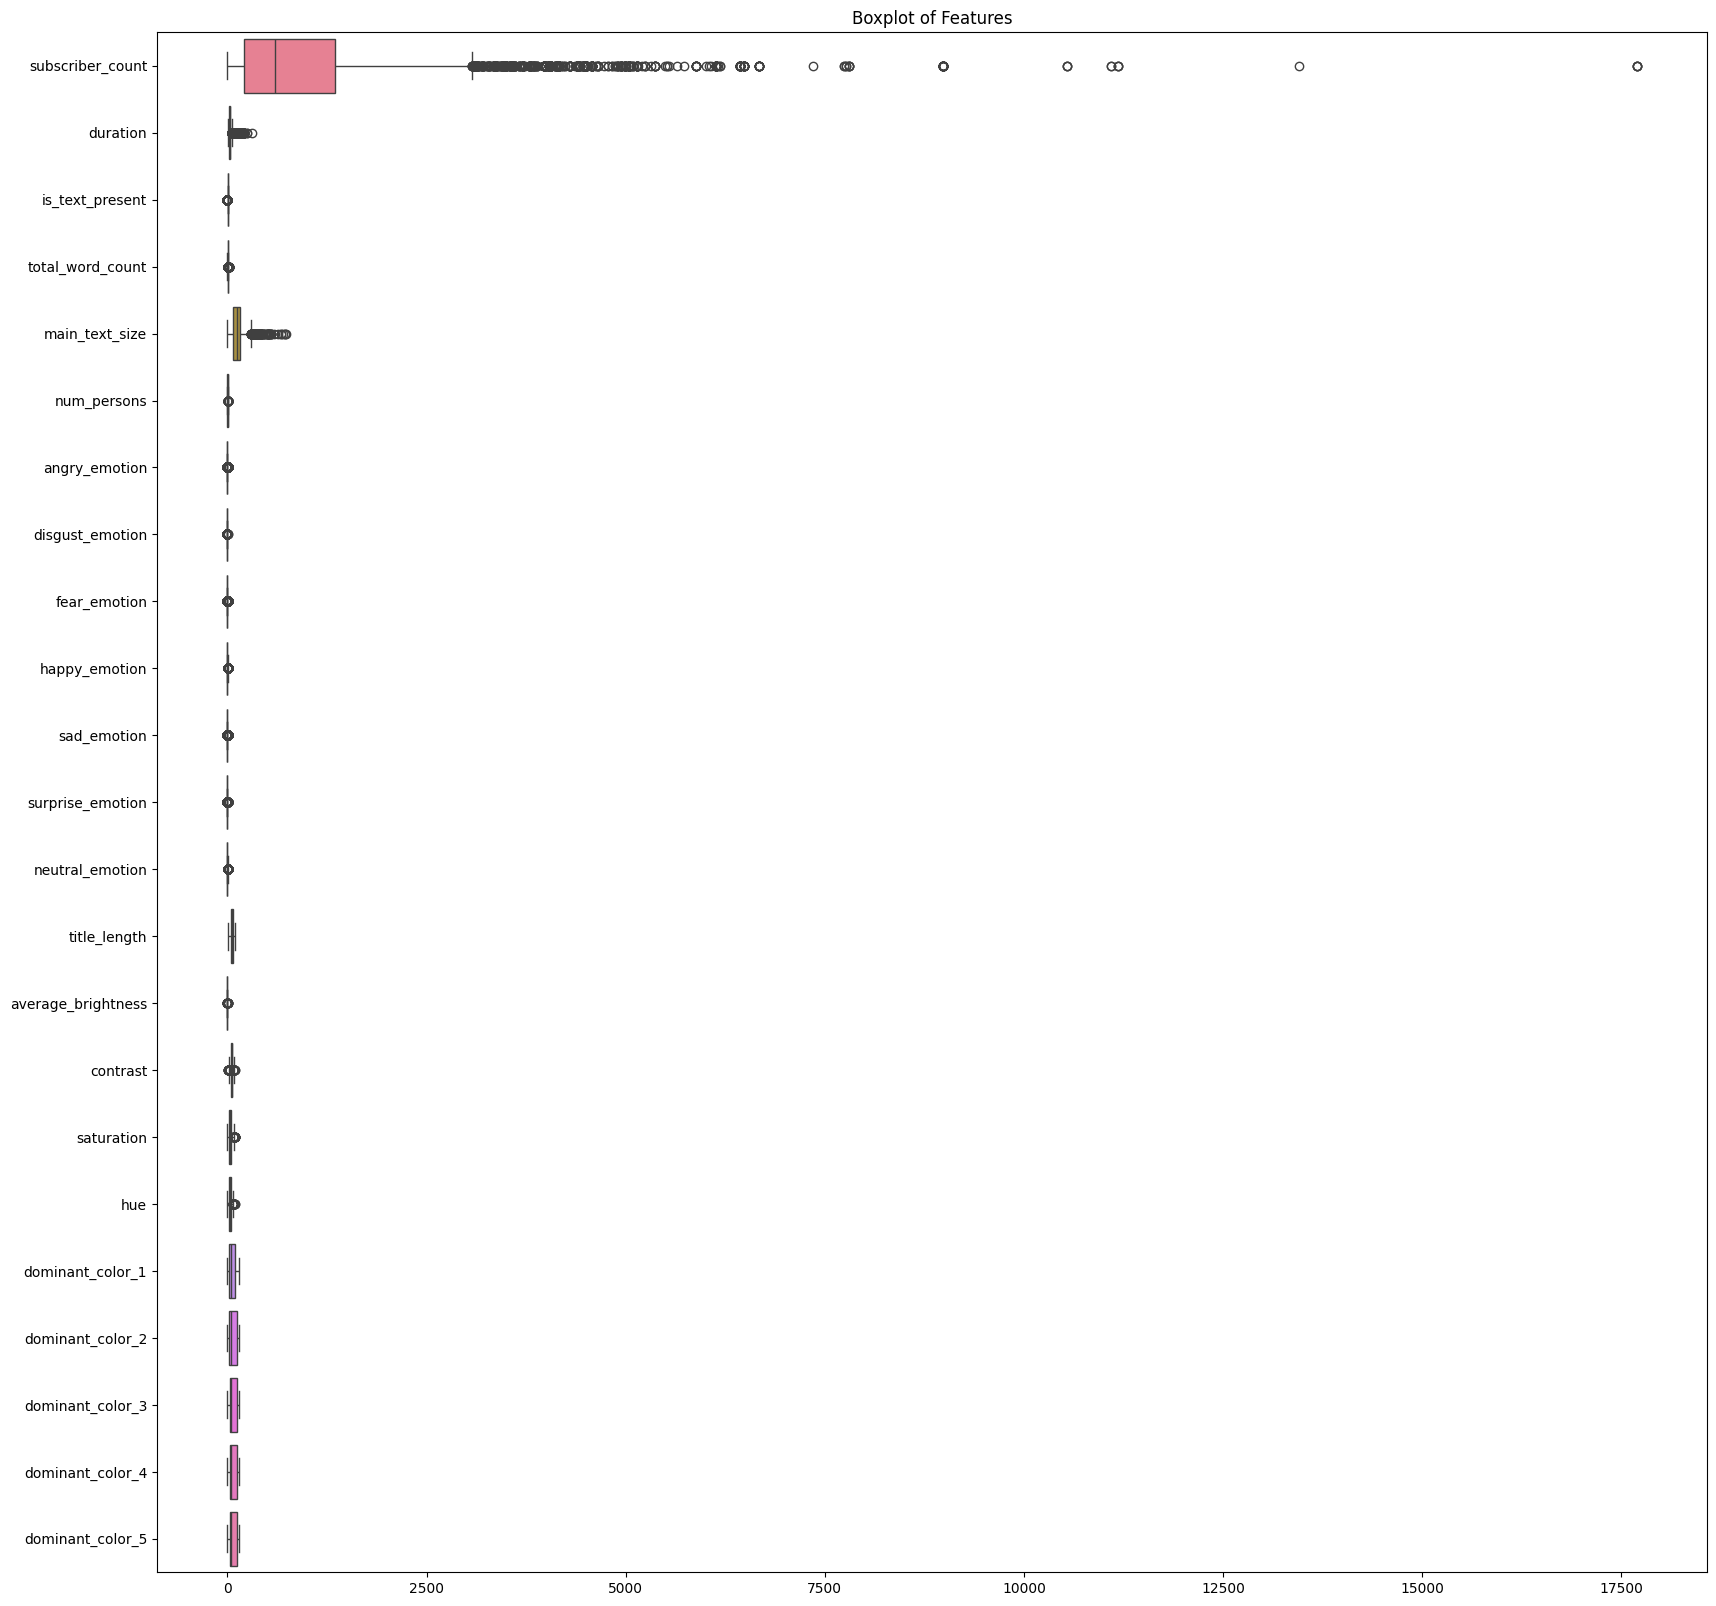

In [412]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of Features")
plt.show()

In [413]:
import numpy as np

def fix_outliers(data):
    # Getting a copy of the dataset, so we can return without changing original dataset
    data_copy = data.copy()

    print(f"Before fixing outliers - Shape: {data_copy.shape}")

    # Select only numeric columns
    numeric_columns = data_copy.select_dtypes(include=['float64', 'int64']).columns

    for column in numeric_columns:
        # Calculate the IQR
        IQR = data_copy[column].quantile(0.75) - data_copy[column].quantile(0.25)
        lower_limit = data_copy[column].quantile(0.25) - (IQR * 1.5)
        upper_limit = data_copy[column].quantile(0.75) + (IQR * 1.5)

        # Clip the outliers
        data_copy[column] = np.where(
            data_copy[column] > upper_limit, upper_limit, 
            np.where(data_copy[column] < lower_limit, lower_limit, data_copy[column])
        )
        
    print(f'Outliers fixed.')  
    print(f"After fixing outliers - Shape: {data_copy.shape}") 
    return data_copy

# Fixing outliers using IQR
df_without_outliers = fix_outliers(df)

Before fixing outliers - Shape: (9300, 24)
Outliers fixed.
After fixing outliers - Shape: (9300, 24)


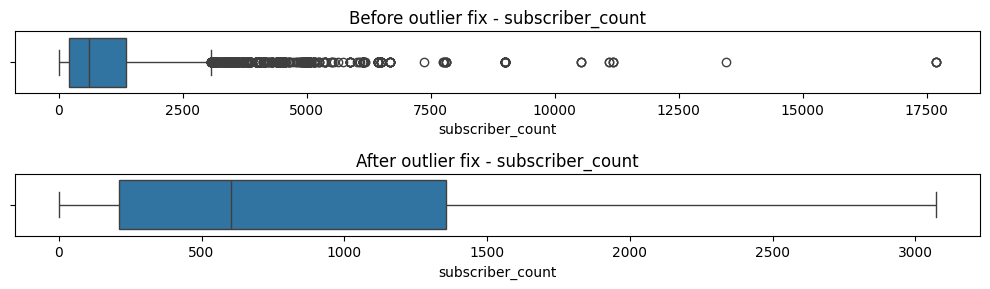

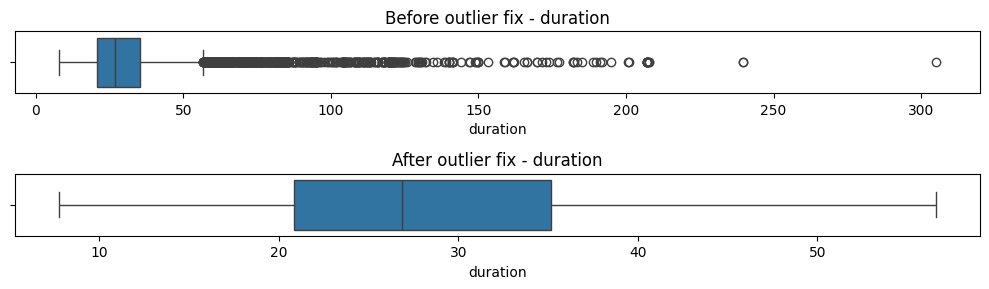

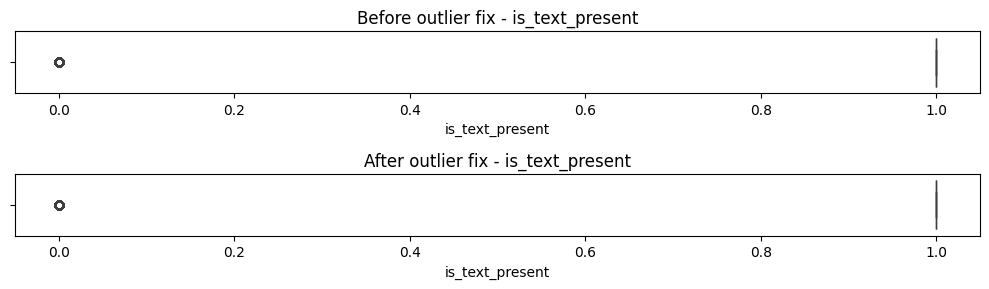

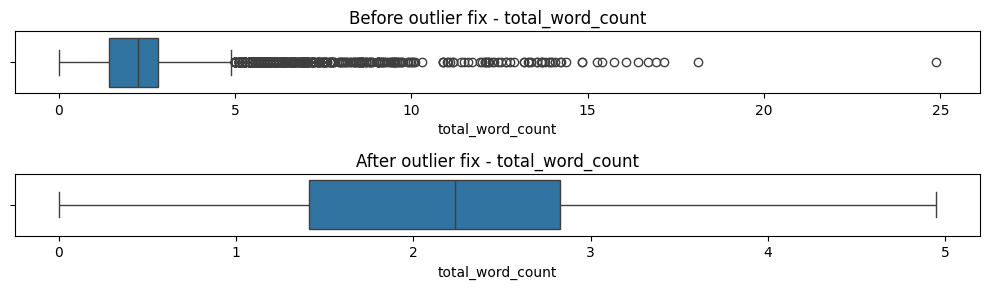

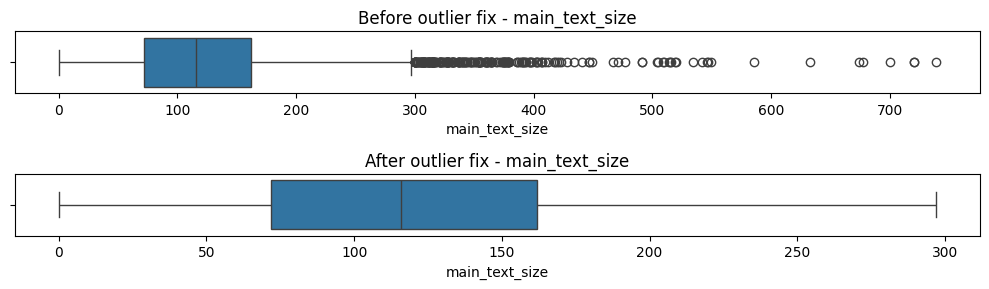

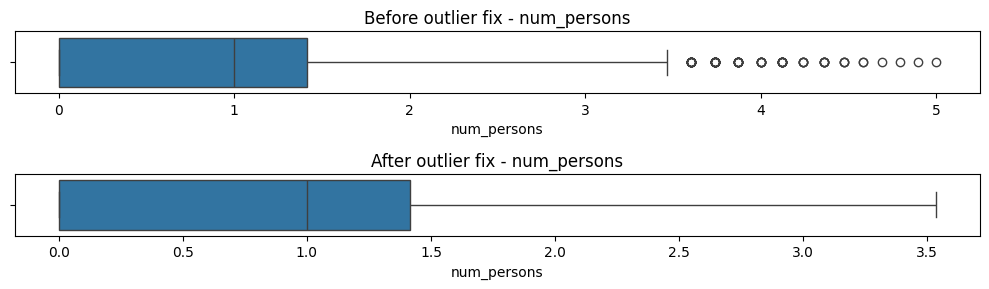

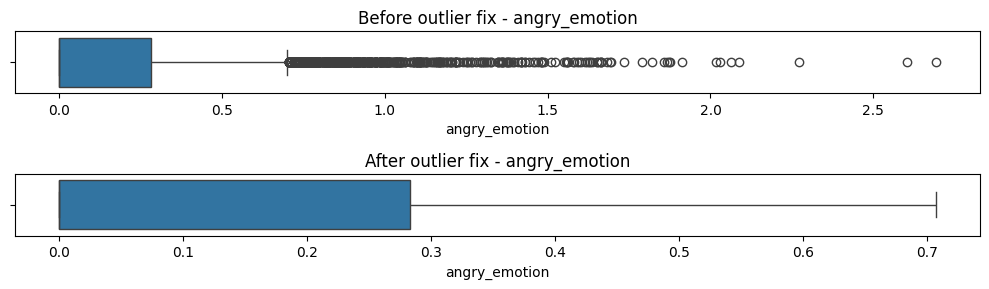

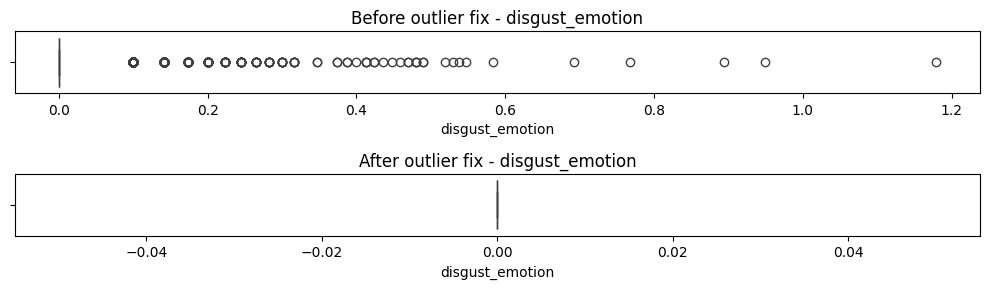

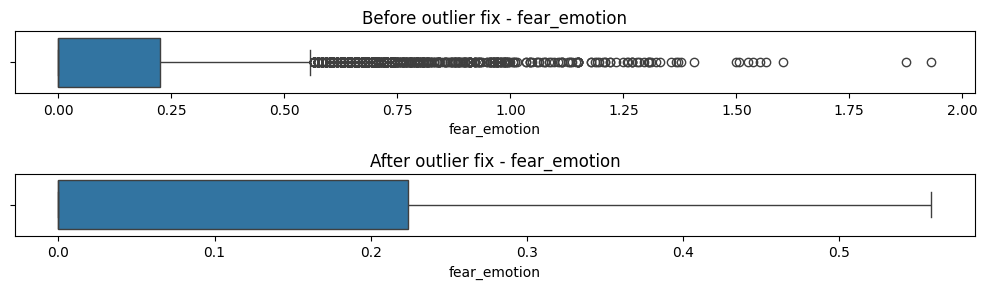

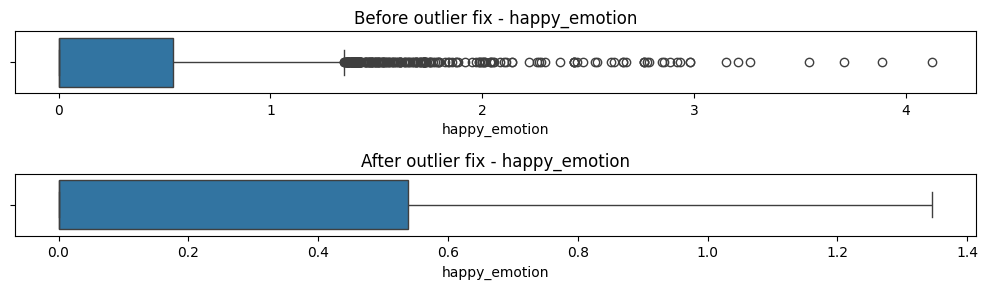

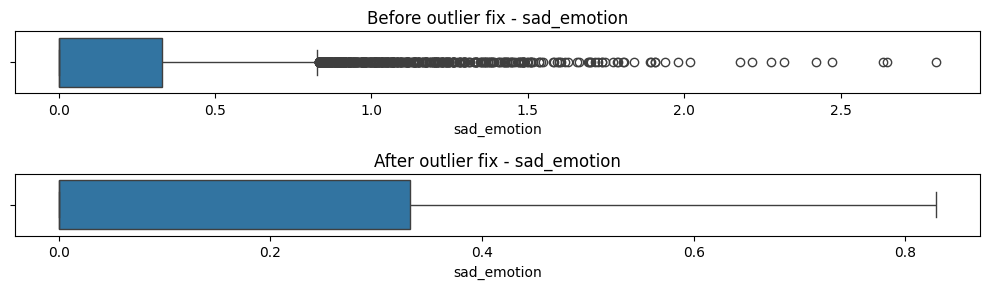

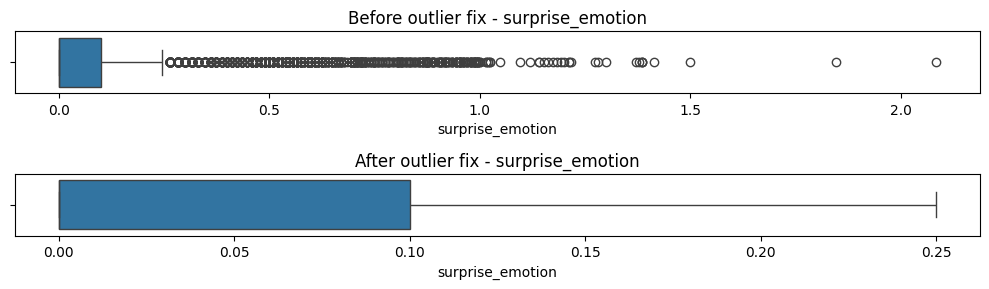

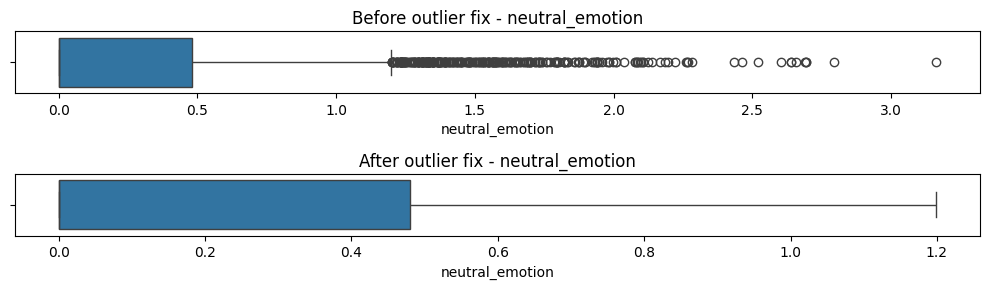

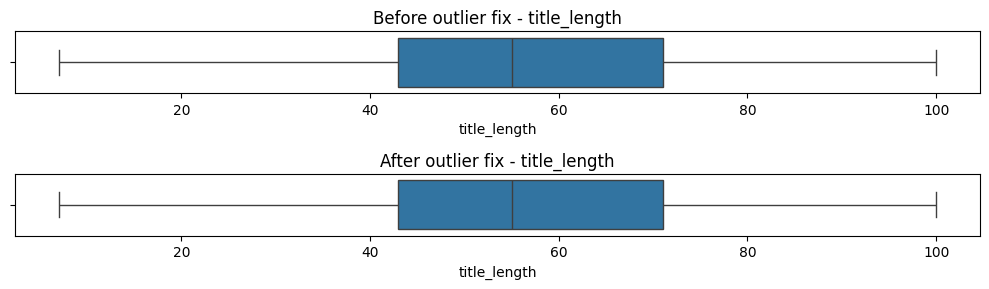

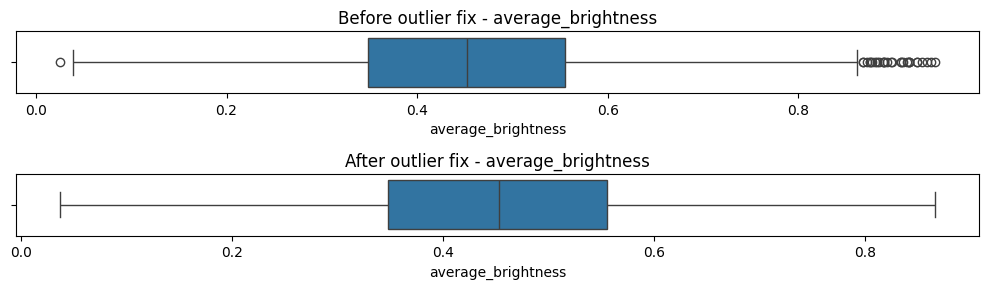

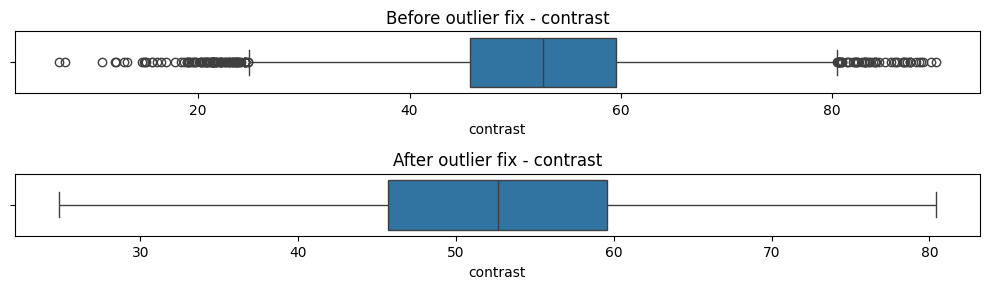

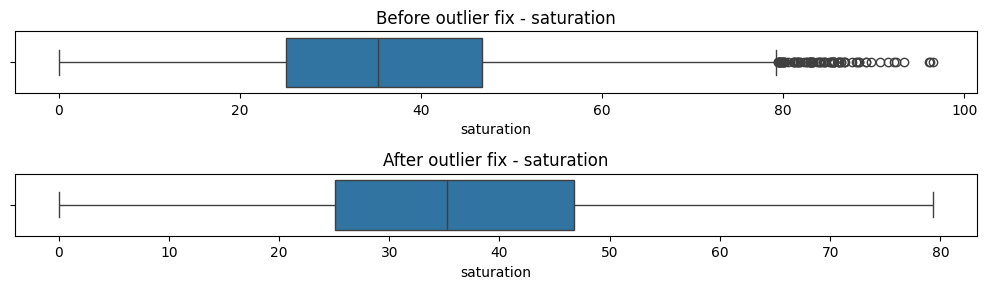

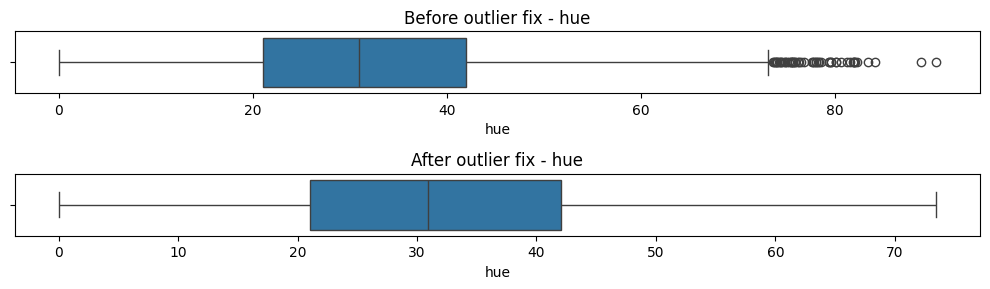

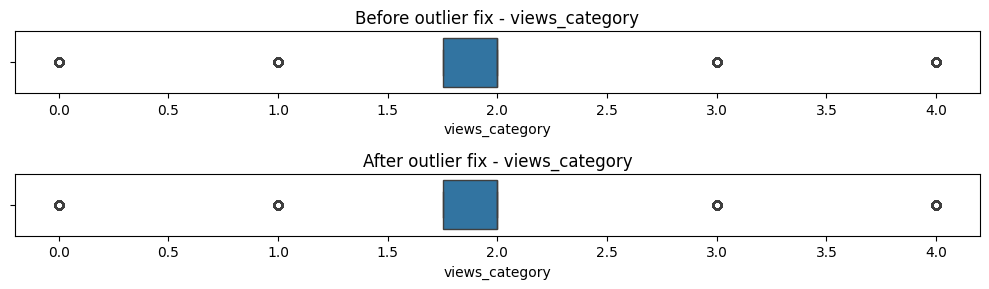

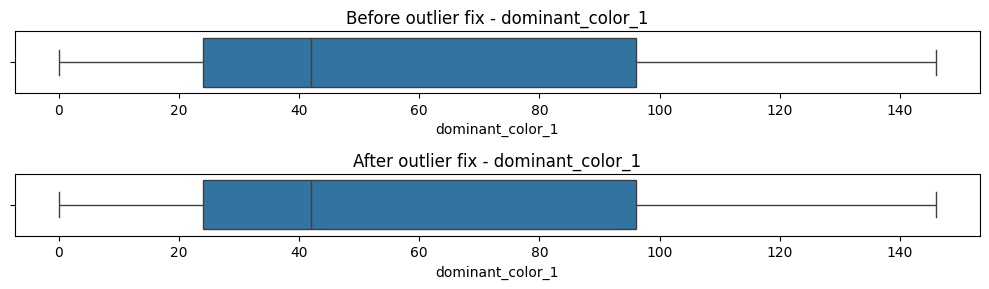

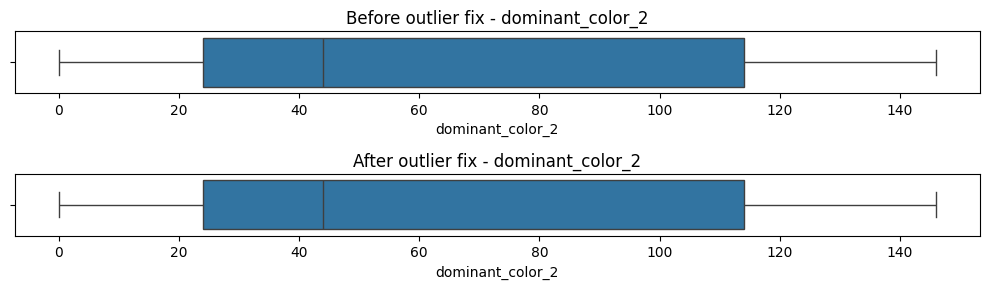

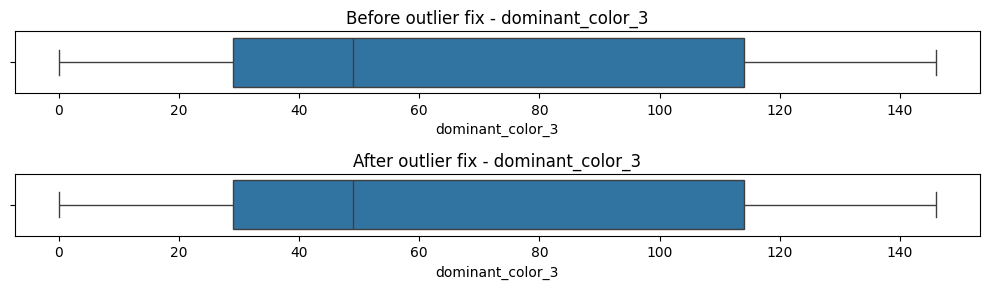

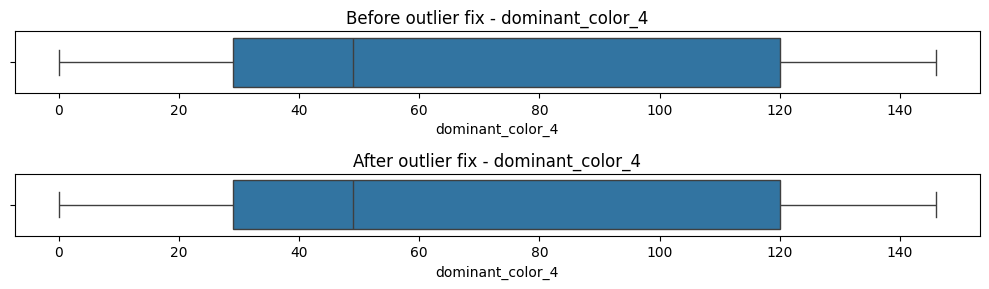

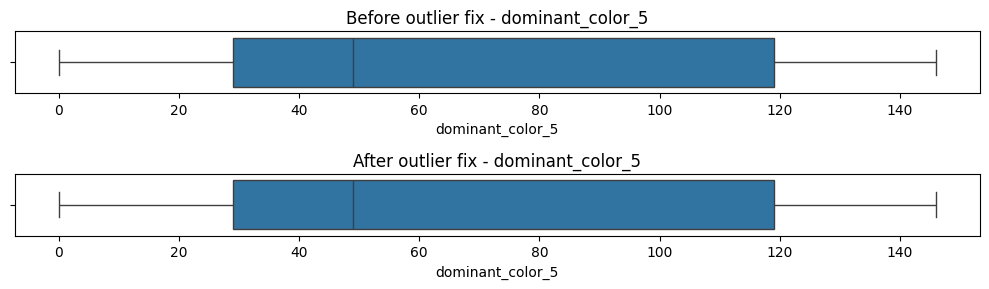

In [414]:
# Showing visually before and after outlier fixed
def plot_before_after_outlier_fix(original_data, transformed_data):
    for column in original_data:
        plt.figure(figsize=(10, 3))
        plt.subplot(2, 1, 1)
        sns.boxplot(data=original_data[column], orient="h")
        plt.title(f"Before outlier fix - {column}")

        plt.subplot(2, 1, 2)
        sns.boxplot(data=transformed_data[column], orient="h")
        plt.title(f"After outlier fix - {column}")
        plt.tight_layout()        
        plt.show()

# Visualizing before and after fixing outliers
plot_before_after_outlier_fix(df, df_without_outliers)

In [415]:
df = df_without_outliers

## Feature Selection

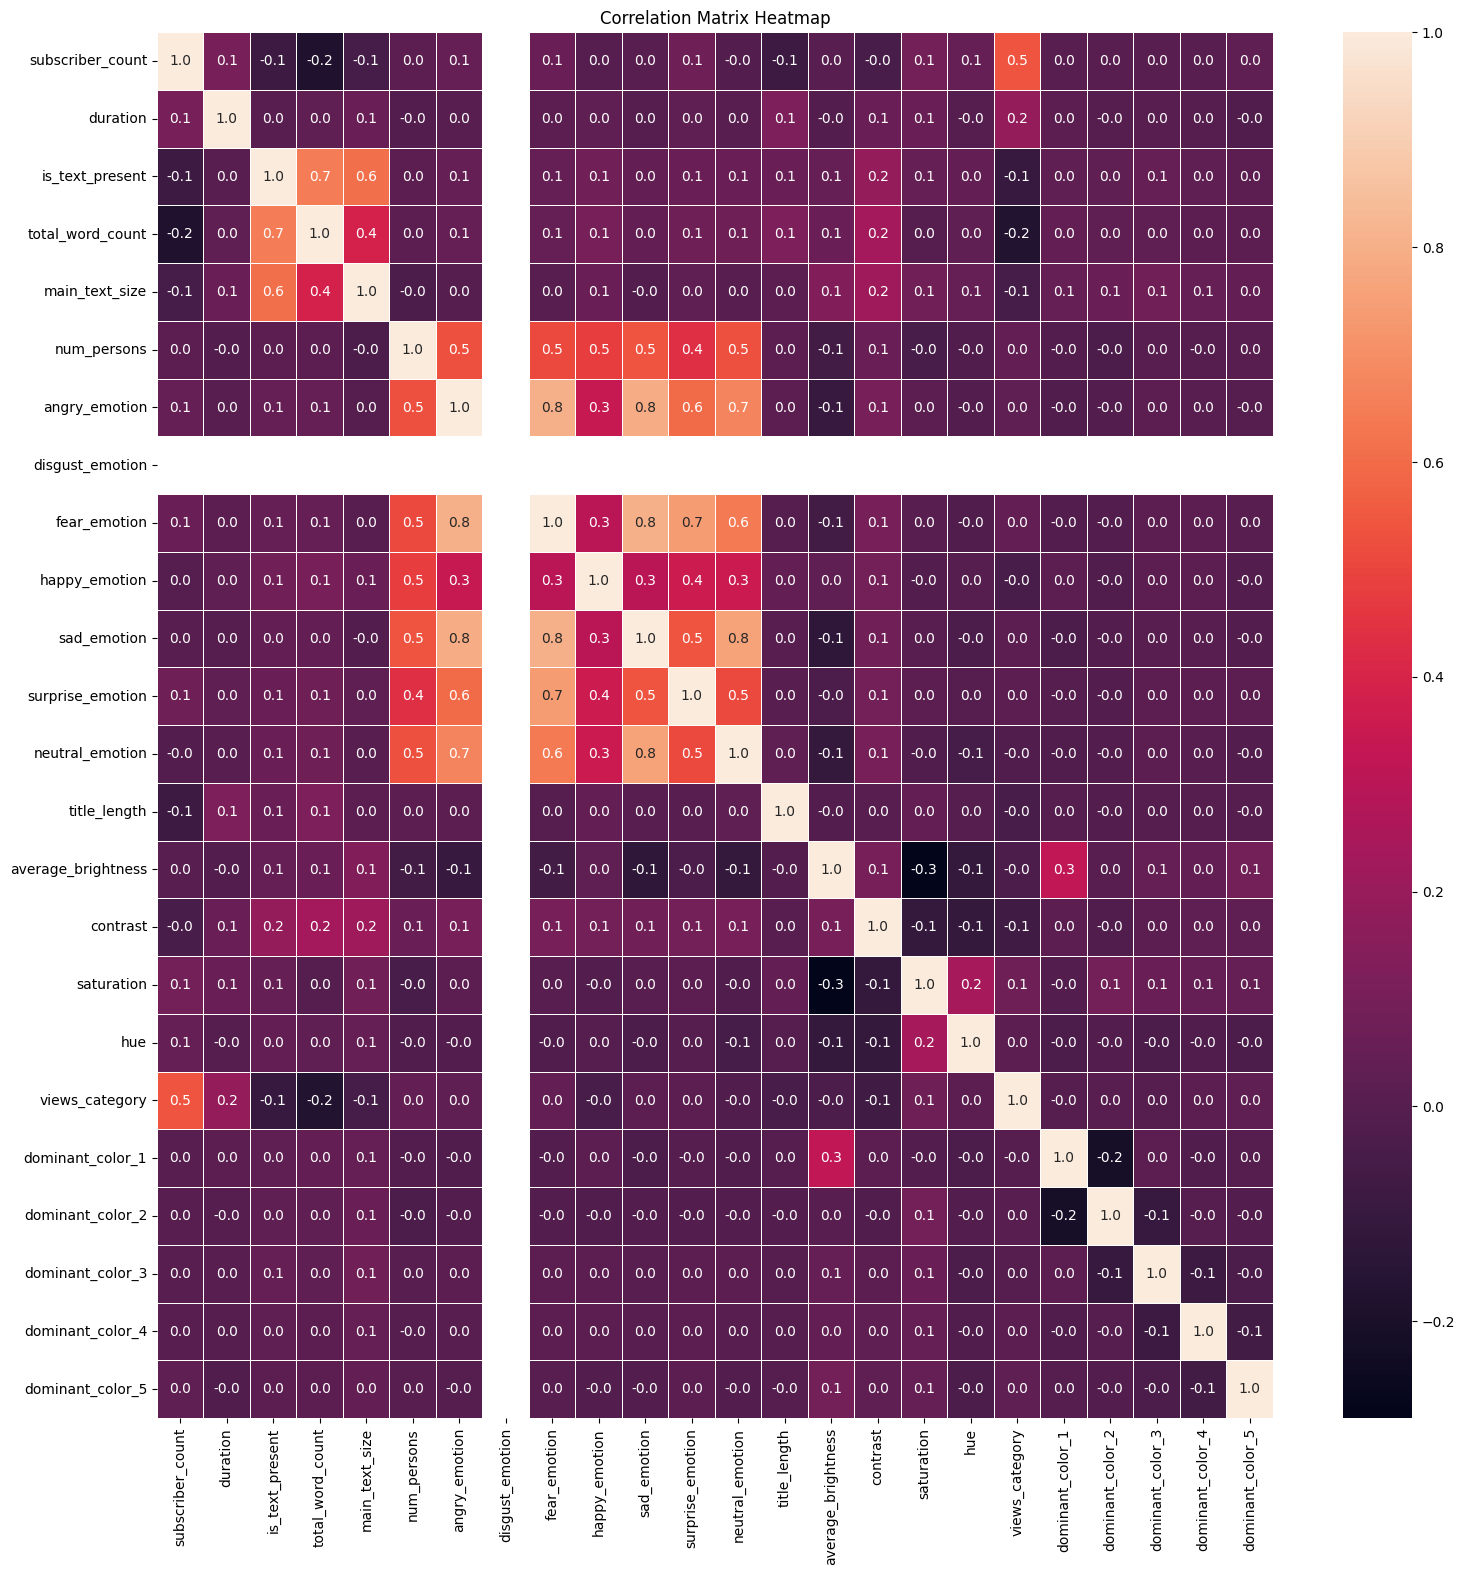

In [416]:
# Visualize correlation matrix heatmap
def plot_correlation_matrix_heatmap(data, threshold = 0):
    correlation_matrix = data.corr().round(2)
    
    if threshold > 0:
        # Apply the mask to the correlation matrix
        correlation_matrix = correlation_matrix[np.abs(correlation_matrix) > threshold]

    plt.figure(figsize=(18, 18)) 
    sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.1f')
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Checking correlation between each feature
plot_correlation_matrix_heatmap(df)

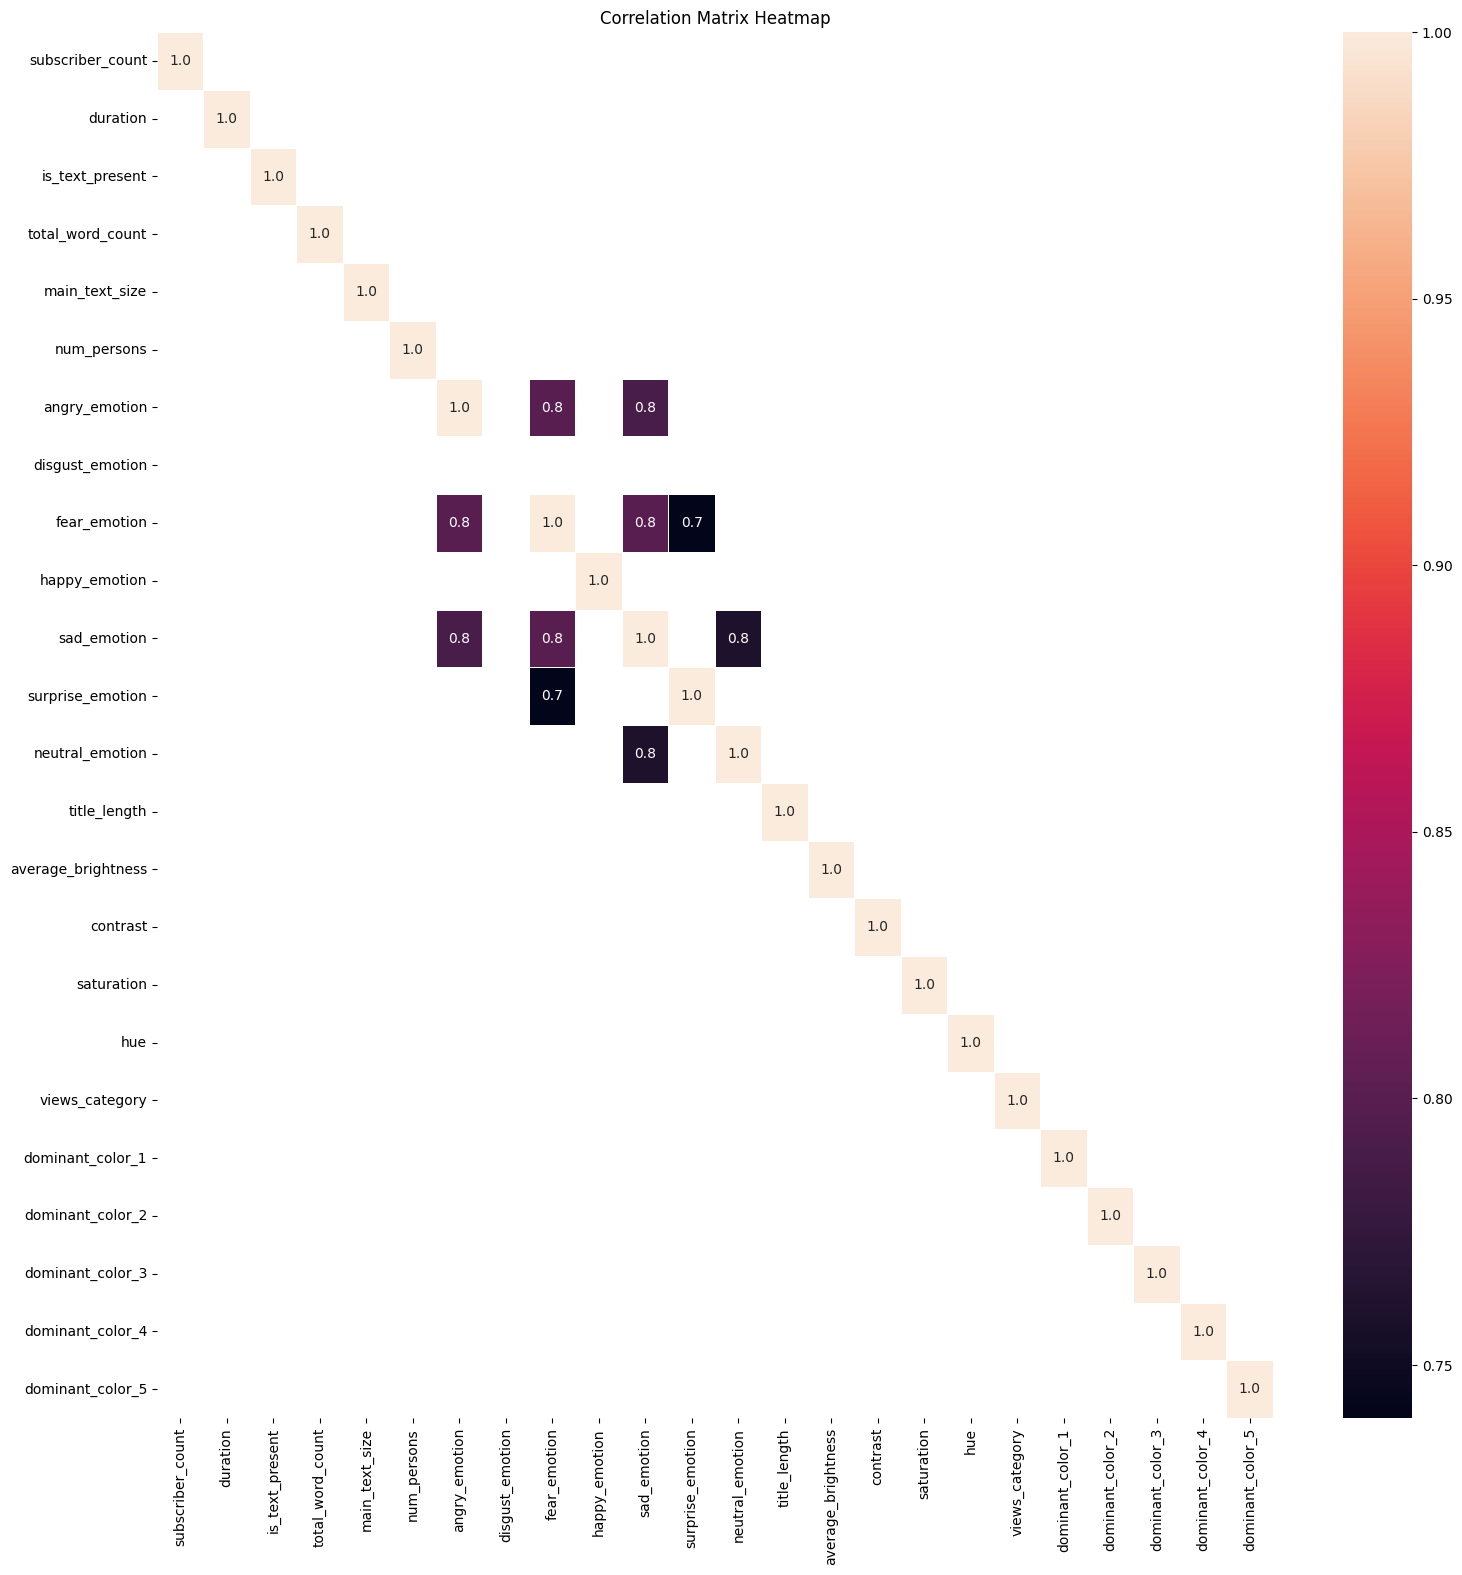

In [417]:
# Since there are lots of feature, Let's show only highly correlated ones only. So It's easier to understand. 
# Only showing correlation more than 0.7
plot_correlation_matrix_heatmap(df, 0.7)

As we can see only emotion highly corelated with each other. but those feaures are emitoins so will keep those features

# Model Training & Testing

In [418]:
from sklearn.metrics import mean_squared_error, precision_score, f1_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn import metrics
from sklearn.model_selection import train_test_split
import os

# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def save_model(model, filename):
    # Ensure the directory exists
    directory = '../model'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Save the model to disk
    filename = directory + "/" + filename
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

# Evaluate a ML model on the dataset
def evaluate_model(model, data, features, target, is_save_model=False):
    result = {}

    # Setting X & y for the model
    X = data[features]
    y = data[target]

    # Splitting the data for train and test, setting 25% of data to be test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Fitting data to the model
    model.fit(X_train, y_train)

    # Make prediction on the test set
    predictions = model.predict(X_test)

    # Model Evaluation Metrics
    model_name = model.__class__.__name__
    mse = round(mean_squared_error(y_test, predictions), 3)
    accuracy = round(metrics.accuracy_score(y_test, predictions), 3)
    precision = round(precision_score(y_test, predictions, average='weighted'), 3)
    recall = round(recall_score(y_test, predictions, average='weighted'), 3)
    f1 = round(f1_score(y_test, predictions, average='weighted'), 3)

    # Checking if selected features are all the columns in the dataset
    is_all_features = len(features) == (len(data.columns) - 1)

    # Result dictionary
    result = {
        'Model': model_name, 
        'Accuracy': accuracy,
        'Mean Squared Error': mse,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'All Features Used': is_all_features
    }

    print('Features Used')
    print(features)

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f'Mean Squared Error: {mse}')

    # Detailed Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

    # Confusion Matrix
    c_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Check if the model has feature importances and plot them
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
        
        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Feature Importance in {model_name}')
        plt.show()
    else:
        print(f"The model {model_name} does not support feature importances.")

    # Save the model if needed
    if is_save_model:
        print(f"Saving model to disk...")
        save_model(model, f'ytpa_model.pkl')

    return result

# Creating a list which holds each model's results
results = []


## All Features

In [419]:
all_features = df.drop(columns='views_category').columns

Features Used
Index(['subscriber_count', 'duration', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'dominant_color_1', 'dominant_color_2',
       'dominant_color_3', 'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.583
Precision: 0.554
Recall: 0.583
F1 Score: 0.518
Mean Squared Error: 0.791

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       240
           1       0.45      0.16      0.23       340
           2       0.59      0.92      0.72      1176
           3       0.46      0.10      0.16       345
           4       0.63      0.30      0.40       224

    accuracy                           0.58      2325
   macro avg       0.54      0

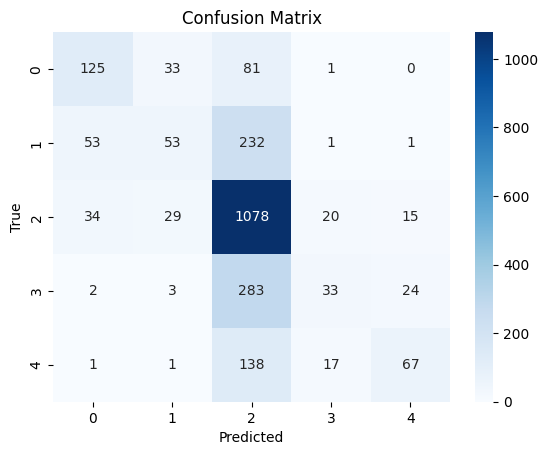

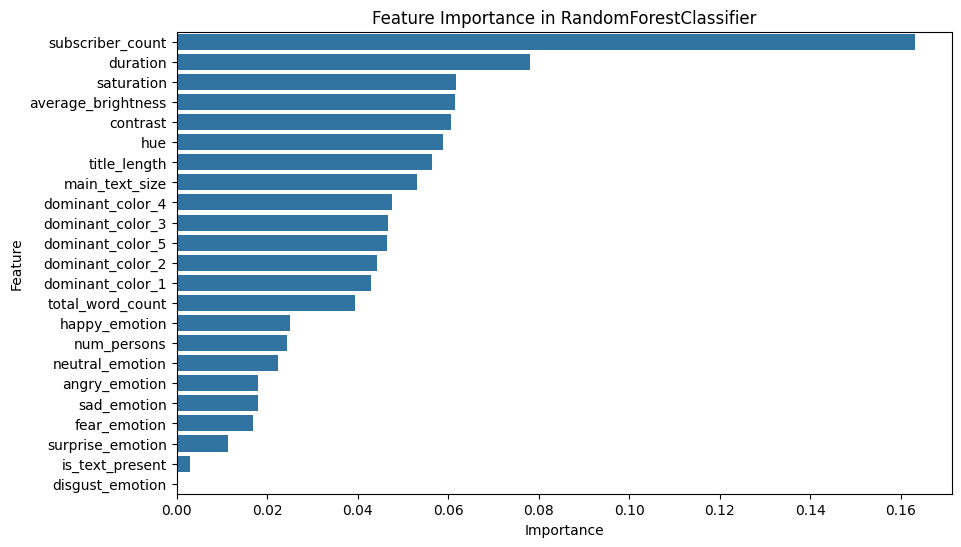

In [420]:
results.append(evaluate_model(RandomForestClassifier(), df, all_features, 'views_category'))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Features Used
Index(['subscriber_count', 'duration', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'dominant_color_1', 'dominant_color_2',
       'dominant_color_3', 'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.559
Precision: 0.39
Recall: 0.559
F1 Score: 0.456
Mean Squared Error: 0.928

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.70      0.56       240
           1       0.00      0.00      0.00       340
           2       0.59      0.89      0.71      1176
           3       0.00      0.00      0.00       345
           4       0.45      0.38      0.41       224

    accuracy                           0.56      2325
   macro avg       0.30      0.

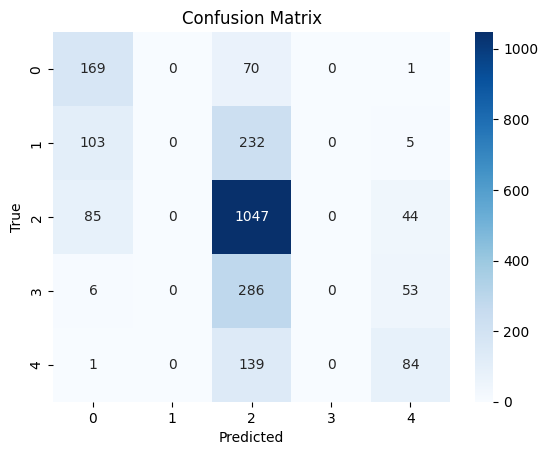

The model SVC does not support feature importances.


In [421]:
results.append(evaluate_model(SVC(), df, all_features, 'views_category'))

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Features Used
Index(['subscriber_count', 'duration', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'dominant_color_1', 'dominant_color_2',
       'dominant_color_3', 'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.54
Precision: 0.448
Recall: 0.54
F1 Score: 0.436
Mean Squared Error: 0.979

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.37      0.44       240
           1       0.25      0.01      0.02       340
           2       0.55      0.93      0.69      1176
           3       0.21      0.01      0.02       345
           4       0.47      0.29      0.36       224

    accuracy                           0.54      2325
   macro avg       0.40      0.3

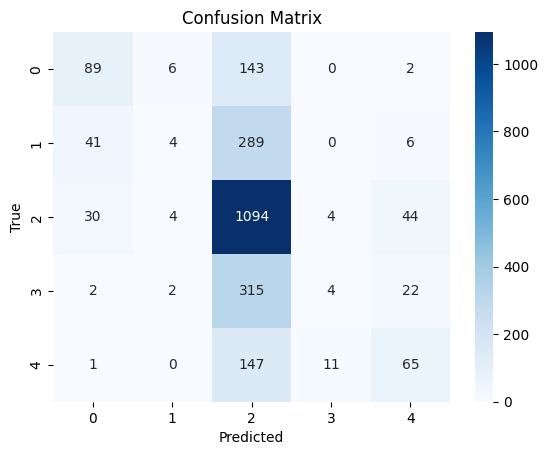

The model LogisticRegression does not support feature importances.


In [422]:
results.append(evaluate_model(LogisticRegression(), df, all_features, 'views_category'))

Features Used
Index(['subscriber_count', 'duration', 'is_text_present', 'total_word_count',
       'main_text_size', 'num_persons', 'angry_emotion', 'disgust_emotion',
       'fear_emotion', 'happy_emotion', 'sad_emotion', 'surprise_emotion',
       'neutral_emotion', 'title_length', 'average_brightness', 'contrast',
       'saturation', 'hue', 'dominant_color_1', 'dominant_color_2',
       'dominant_color_3', 'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.45
Precision: 0.452
Recall: 0.45
F1 Score: 0.451
Mean Squared Error: 1.218

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       240
           1       0.26      0.27      0.27       340
           2       0.59      0.59      0.59      1176
           3       0.27      0.26      0.27       345
           4       0.31      0.34      0.32       224

    accuracy                           0.45      2325
   macro avg       0.37      0.3

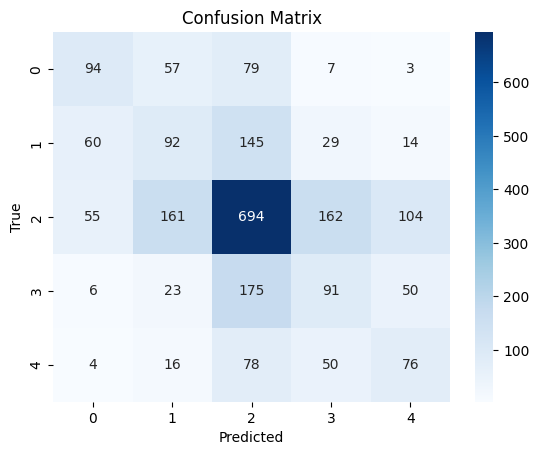

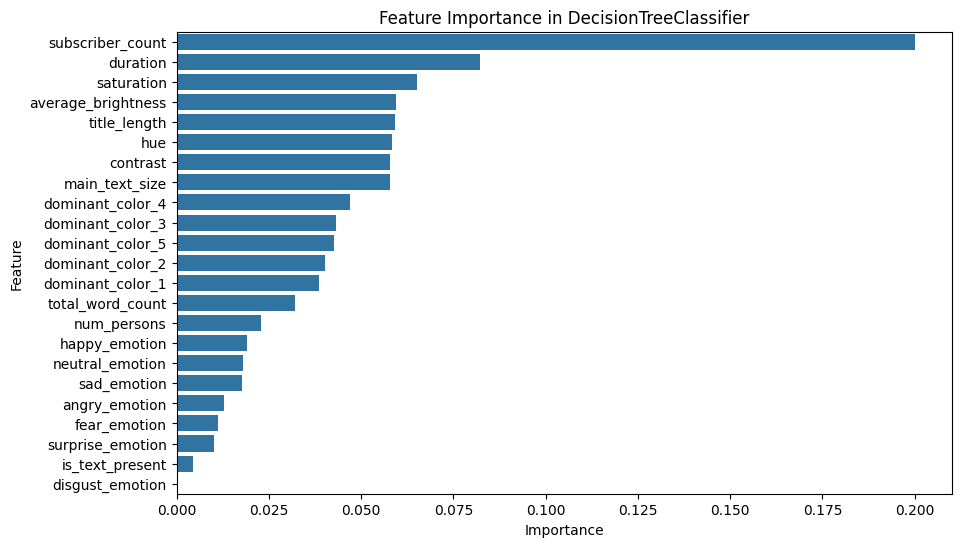

In [423]:
results.append(evaluate_model(DecisionTreeClassifier(), df, all_features, 'views_category'))

## Selected Features

In [424]:
column_drop_list =[
    'views_category',
    'disgust_emotion',
    'is_text_present',
]
selected_features = df.drop(columns=column_drop_list).columns
print(selected_features)

Index(['subscriber_count', 'duration', 'total_word_count', 'main_text_size',
       'num_persons', 'angry_emotion', 'fear_emotion', 'happy_emotion',
       'sad_emotion', 'surprise_emotion', 'neutral_emotion', 'title_length',
       'average_brightness', 'contrast', 'saturation', 'hue',
       'dominant_color_1', 'dominant_color_2', 'dominant_color_3',
       'dominant_color_4', 'dominant_color_5'],
      dtype='object')


Features Used
Index(['subscriber_count', 'duration', 'total_word_count', 'main_text_size',
       'num_persons', 'angry_emotion', 'fear_emotion', 'happy_emotion',
       'sad_emotion', 'surprise_emotion', 'neutral_emotion', 'title_length',
       'average_brightness', 'contrast', 'saturation', 'hue',
       'dominant_color_1', 'dominant_color_2', 'dominant_color_3',
       'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.58
Precision: 0.549
Recall: 0.58
F1 Score: 0.515
Mean Squared Error: 0.794

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       240
           1       0.40      0.15      0.22       340
           2       0.59      0.91      0.72      1176
           3       0.48      0.10      0.16       345
           4       0.60      0.29      0.40       224

    accuracy                           0.58      2325
   macro avg       0.53      0.39      0.41      2325
weighted avg    

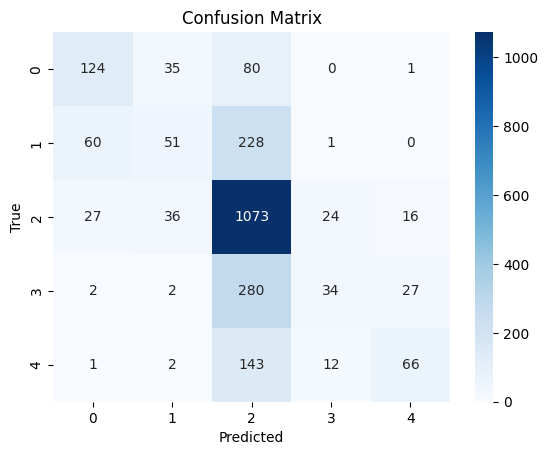

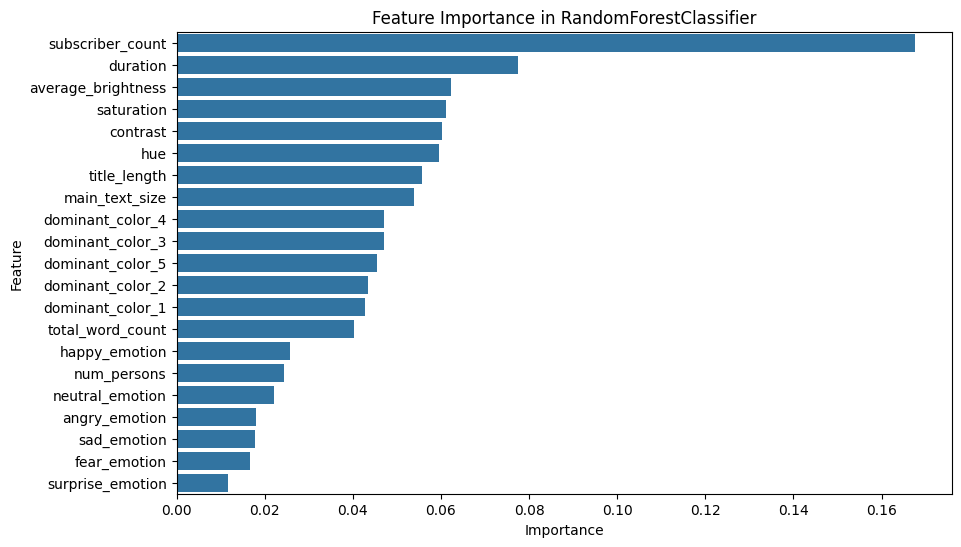

In [425]:
results.append(evaluate_model(RandomForestClassifier(), df, selected_features, 'views_category'))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Features Used
Index(['subscriber_count', 'duration', 'total_word_count', 'main_text_size',
       'num_persons', 'angry_emotion', 'fear_emotion', 'happy_emotion',
       'sad_emotion', 'surprise_emotion', 'neutral_emotion', 'title_length',
       'average_brightness', 'contrast', 'saturation', 'hue',
       'dominant_color_1', 'dominant_color_2', 'dominant_color_3',
       'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.559
Precision: 0.39
Recall: 0.559
F1 Score: 0.456
Mean Squared Error: 0.928

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.70      0.56       240
           1       0.00      0.00      0.00       340
           2       0.59      0.89      0.71      1176
           3       0.00      0.00      0.00       345
           4       0.45      0.38      0.41       224

    accuracy                           0.56      2325
   macro avg       0.30      0.39      0.34      2325
weighted avg   

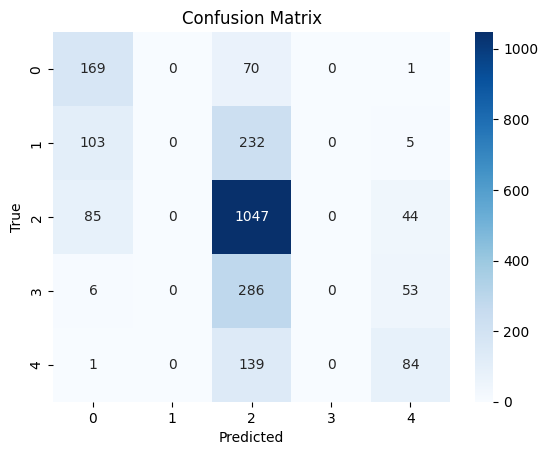

The model SVC does not support feature importances.


In [426]:
results.append(evaluate_model(SVC(), df, selected_features, 'views_category'))

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Features Used
Index(['subscriber_count', 'duration', 'total_word_count', 'main_text_size',
       'num_persons', 'angry_emotion', 'fear_emotion', 'happy_emotion',
       'sad_emotion', 'surprise_emotion', 'neutral_emotion', 'title_length',
       'average_brightness', 'contrast', 'saturation', 'hue',
       'dominant_color_1', 'dominant_color_2', 'dominant_color_3',
       'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.54
Precision: 0.451
Recall: 0.54
F1 Score: 0.441
Mean Squared Error: 0.968

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.36      0.43       240
           1       0.22      0.01      0.03       340
           2       0.56      0.93      0.69      1176
           3       0.26      0.03      0.05       345
           4       0.45      0.29      0.35       224

    accuracy                           0.54      2325
   macro avg       0.40      0.32      0.31      2325
weighted avg    

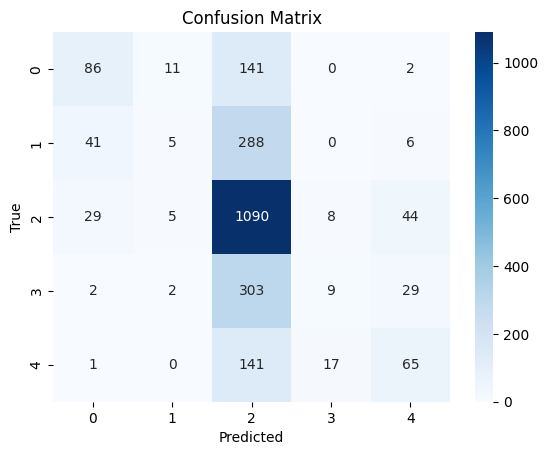

The model LogisticRegression does not support feature importances.


In [427]:
results.append(evaluate_model(LogisticRegression(), df, selected_features, 'views_category'))

Features Used
Index(['subscriber_count', 'duration', 'total_word_count', 'main_text_size',
       'num_persons', 'angry_emotion', 'fear_emotion', 'happy_emotion',
       'sad_emotion', 'surprise_emotion', 'neutral_emotion', 'title_length',
       'average_brightness', 'contrast', 'saturation', 'hue',
       'dominant_color_1', 'dominant_color_2', 'dominant_color_3',
       'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.449
Precision: 0.456
Recall: 0.449
F1 Score: 0.452
Mean Squared Error: 1.24

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38       240
           1       0.26      0.28      0.27       340
           2       0.60      0.58      0.59      1176
           3       0.28      0.28      0.28       345
           4       0.31      0.37      0.34       224

    accuracy                           0.45      2325
   macro avg       0.37      0.37      0.37      2325
weighted avg   

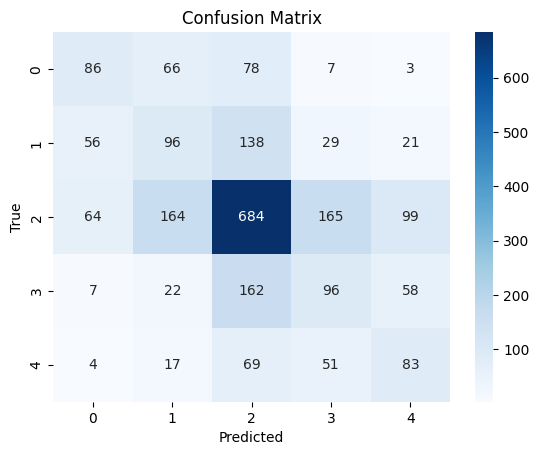

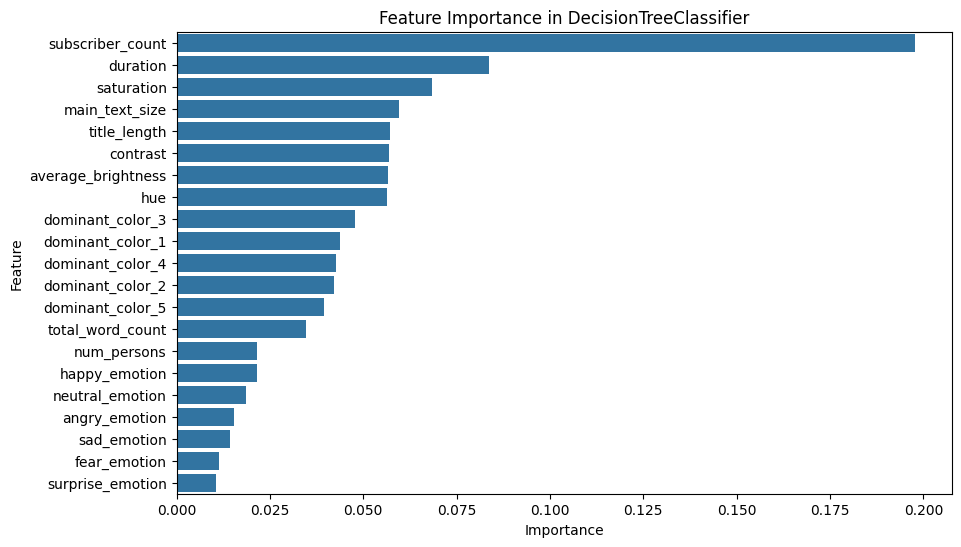

In [428]:
results.append(evaluate_model(DecisionTreeClassifier(), df, selected_features, 'views_category'))

## Results

In [429]:
result_data = pd.DataFrame(results)
result_data.head(n=10)

,Model,Accuracy,Mean Squared Error,Precision,Recall,F1 Score,All Features Used
0,RandomForestClassifier,0.583,0.791,0.554,0.583,0.518,True
1,SVC,0.559,0.928,0.390,0.559,0.456,True
2,LogisticRegression,0.540,0.979,0.448,0.540,0.436,True
3,DecisionTreeClassifier,0.450,1.218,0.452,0.450,0.451,True
4,RandomForestClassifier,0.580,0.794,0.549,0.580,0.515,False
5,SVC,0.559,0.928,0.390,0.559,0.456,False
6,LogisticRegression,0.540,0.968,0.451,0.540,0.441,False
7,DecisionTreeClassifier,0.449,1.240,0.456,0.449,0.452,False


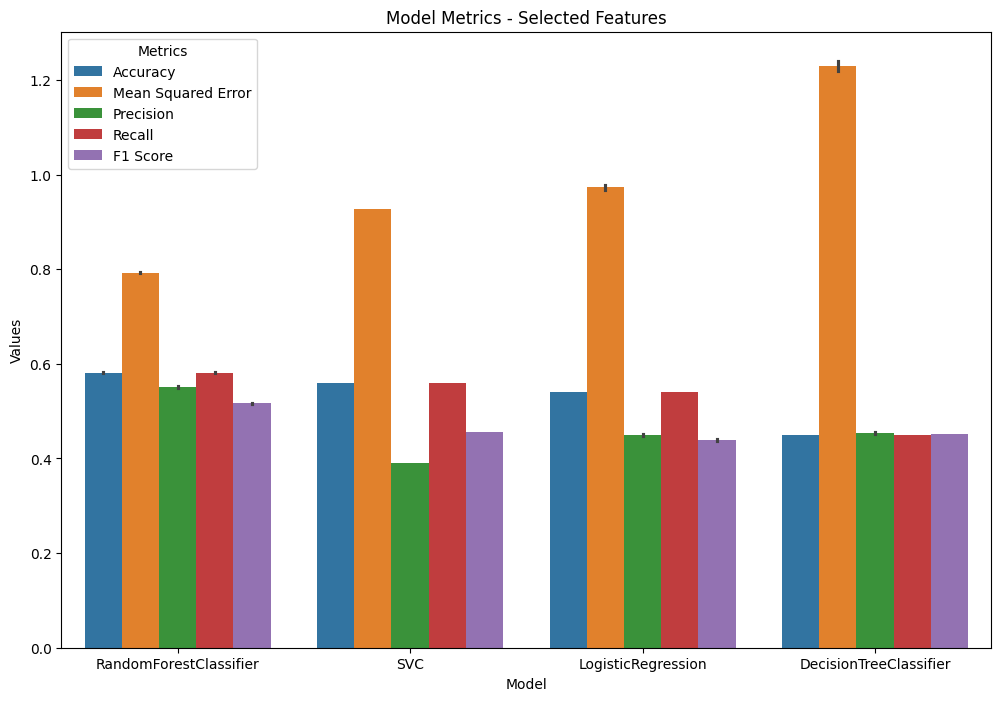

In [430]:
def plot_bar_metrics(data, target_column, title):
    plt.figure(figsize=(12, 8))
    df_long = data.melt(id_vars=[target_column], var_name='Metric', value_name='Value')
    sns.barplot(x='Model', y='Value', hue='Metric', data=df_long)
    plt.title(title)
    plt.ylabel('Values')
    plt.legend(title='Metrics')
    plt.show()


# visualizing metrics using bar plot
plot_bar_metrics(result_data.drop(columns="All Features Used"), 'Model', 'Model Metrics - Selected Features')

As per the results we can see Random Forest Classifier is the best model for this dataset, and we will use all the features since it doesnt apper to have effect when features are selected. 

# Model creation

Features Used
Index(['subscriber_count', 'duration', 'total_word_count', 'main_text_size',
       'num_persons', 'angry_emotion', 'fear_emotion', 'happy_emotion',
       'sad_emotion', 'surprise_emotion', 'neutral_emotion', 'title_length',
       'average_brightness', 'contrast', 'saturation', 'hue',
       'dominant_color_1', 'dominant_color_2', 'dominant_color_3',
       'dominant_color_4', 'dominant_color_5'],
      dtype='object')
Accuracy: 0.572
Precision: 0.535
Recall: 0.572
F1 Score: 0.507
Mean Squared Error: 0.804

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.51      0.55       240
           1       0.38      0.14      0.21       340
           2       0.59      0.90      0.71      1176
           3       0.43      0.09      0.14       345
           4       0.61      0.29      0.40       224

    accuracy                           0.57      2325
   macro avg       0.52      0.39      0.40      2325
weighted avg  

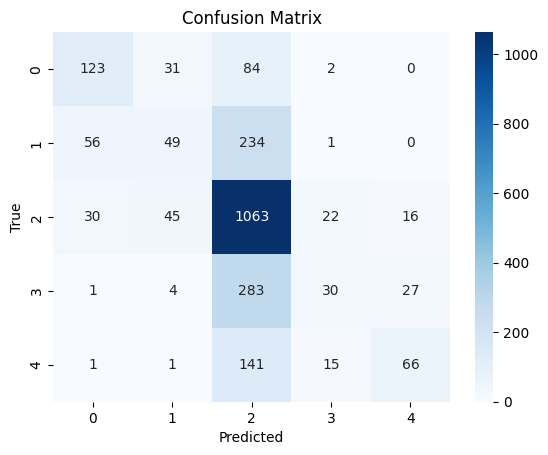

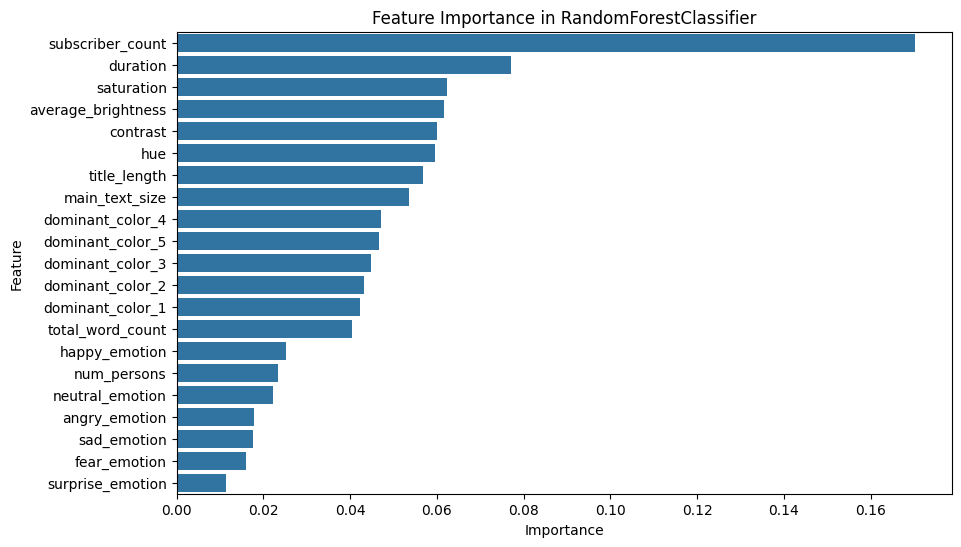

Saving model to disk...
Model saved to ../model/ytpa_model.pkl


{'Model': 'RandomForestClassifier',
 'Accuracy': 0.572,
 'Mean Squared Error': 0.804,
 'Precision': 0.535,
 'Recall': 0.572,
 'F1 Score': 0.507,
 'All Features Used': False}

In [431]:
evaluate_model(RandomForestClassifier(), df, selected_features, 'views_category', is_save_model=True)

# Testing 

In [432]:
import joblib

with open('../model/ytpa_model.pkl', 'rb') as model_file:
    model = joblib.load(model_file)

image = download_image('https://i.ytimg.com/vi/zGmQlVWXNj0/maxresdefault.jpg')

title = "Top Acoustic Songs 2022 Cover - Best Acoustic Cover of Popular Songs - Soft Acoustic Love Songs"
subscriber_count = 1000000
video_duration = 100

row_data = {}
row_data['title'] = title
row_data['subscriber_count'] = subscriber_count
row_data['duration'] = video_duration

row_data = extract_features(row_data, image)

df = pd.DataFrame([row_data])


# Predict Views
views_expected_columns = model.feature_names_in_
df = df[views_expected_columns]
prediction = model.predict(df)

row_data['prediction'] = prediction[0]

# Ensure all values in row_data are serializable
for key, value in row_data.items():
    if isinstance(value, np.generic):
        row_data[key] = value.item()
        
row_data



0: 384x640 2 persons, 1 bus, 1 dog, 70.0ms
Speed: 2.8ms preprocess, 70.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


{'title': 'Top Acoustic Songs 2022 Cover - Best Acoustic Cover of Popular Songs - Soft Acoustic Love Songs',
 'subscriber_count': 1000000,
 'duration': 100,
 'color_1_r': 253,
 'color_1_g': 253,
 'color_1_b': 253,
 'color_2_r': 72,
 'color_2_g': 58,
 'color_2_b': 48,
 'color_3_r': 192,
 'color_3_g': 170,
 'color_3_b': 151,
 'color_4_r': 11,
 'color_4_g': 6,
 'color_4_b': 6,
 'color_5_r': 130,
 'color_5_g': 108,
 'color_5_b': 91,
 'dominant_color_1': 143,
 'dominant_color_1_name': 'white',
 'dominant_color_2': 36,
 'dominant_color_2_name': 'darkslategray',
 'dominant_color_3': 136,
 'dominant_color_3_name': 'tan',
 'dominant_color_4': 7,
 'dominant_color_4_name': 'black',
 'dominant_color_5': 42,
 'dominant_color_5_name': 'dimgray',
 'is_text_present': True,
 'total_word_count': 4,
 'main_text_size': 121,
 'num_persons': 2,
 'angry_emotion': 0,
 'disgust_emotion': 0,
 'fear_emotion': 0,
 'happy_emotion': 0,
 'sad_emotion': 0,
 'surprise_emotion': 0,
 'neutral_emotion': 0,
 'title_length